<a href="https://colab.research.google.com/github/costaer/PIQueimadas/blob/main/PIQueimadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto integrador IV Univesp Segundo semestre 2025

# Desenvolvimento de API para Previsão de Risco de Queimadas

## Objetivo do Projeto

O objetivo deste projeto é desenvolver uma API para previsão de risco de queimadas na região de São José do Rio Preto, SP. Para isso, selecionamos áreas com características climáticas e agrícolas compatíveis à região de interesse, utilizando dados meteorológicos de estações automáticas do INMET.

---

## Justificativa da Escolha das Áreas

Optou-se por estações localizadas em regiões agrícolas do interior paulista, como Votuporanga, José Bonifácio, Jales, Ariranha, Barretos, Bebedouro e Presidente Prudente. Essas áreas apresentam condições climáticas e de uso do solo semelhantes às de São José do Rio Preto, garantindo a representatividade dos dados para o treinamento do modelo preditivo.

---

## Dados Meteorológicos Selecionados

Os dados meteorológicos foram coletados a partir do [Banco de Dados Meteorológicos do INMET (BDMEP)](https://bdmep.inmet.gov.br/), abrangendo o período de 01/01/2015 a 31/12/2024. As variáveis selecionadas incluem:

- Precipitação Total Horária
- Pressão Atmosférica ao Nível da Estação (Horária)
- Pressão Atmosférica Reduzida ao Nível do Mar (Automática)
- Pressão Atmosférica Máxima na Hora Anterior (Automática)
- Pressão Atmosférica Mínima na Hora Anterior (Automática)
- Radiação Global
- Temperatura da CPU da Estação
- Temperatura do Ar - Bulbo Seco (Horária)
- Temperatura do Ponto de Orvalho
- Temperatura Máxima na Hora Anterior (Automática)
- Temperatura Mínima na Hora Anterior (Automática)
- Temperatura do Orvalho Máxima na Hora Anterior (Automática)
- Temperatura do Orvalho Mínima na Hora Anterior (Automática)
- Tensão da Bateria da Estação
- Umidade Relativa Máxima na Hora Anterior (Automática)
- Umidade Relativa Mínima na Hora Anterior (Automática)
- Umidade Relativa do Ar (Horária)
- Vento - Direção Horária
- Vento - Rajada Máxima
- Vento - Velocidade Horária

---

## Estações Selecionadas

As estações automáticas do INMET selecionadas para coleta dos dados são:

- Ariranha (A736)
- Barretos (A748)
- Bebedouro (A764)
- Jales (A733)
- José Bonifácio (A735)
- Lins (A727)
- Presidente Prudente (A707)
- Votuporanga (A729)

Essas estações foram escolhidas por estarem localizadas em regiões com características climáticas e agrícolas semelhantes às de São José do Rio Preto, garantindo a representatividade dos dados para o modelo preditivo.

---

## Acesso aos Dados

Os dados meteorológicos podem ser acessados através do [Banco de Dados Meteorológicos do INMET (BDMEP)](https://bdmep.inmet.gov.br/), onde é possível selecionar as estações, variáveis e período desejados para download.

---

## Dados de Queimadas

Para correlacionar os dados meteorológicos com eventos de queimadas, utilizamos os dados do [Sistema de Monitoramento de Queimadas do INPE](https://queimadas.dgi.inpe.br/queimadas/portal-static/estatisticas.html), que fornecem informações sobre focos de queimada, incluindo data, hora, localização e intensidade.

---

## Desenvolvimento do Modelo Preditivo

Com os dados meteorológicos e de queimadas correlacionados, será possível treinar um modelo de aprendizado de máquina para prever o risco de incêndios na região de São José do Rio Preto. Variáveis como umidade do ar, temperatura, precipitação e radiação solar serão fundamentais para a acurácia do modelo.

---

## Próximos Passos

1. **Coleta de Dados**: Baixar os dados meteorológicos das estações selecionadas e os dados de focos de queimada.
2. **Pré-processamento**: Limpar e formatar os dados para análise.
3. **Análise Exploratória**: Explorar as relações entre as variáveis meteorológicas e os focos de queimada.
4. **Modelagem**: Desenvolver e treinar modelos preditivos utilizando técnicas de aprendizado de máquina.
5. **Avaliação**: Avaliar a performance do modelo utilizando métricas apropriadas.
6. **Implementação**: Integrar o modelo em uma API para previsão de risco de queimadas.

---

## Conclusão

A estratégia de focar em estações meteorológicas próximas a São José do Rio Preto e correlacionar com os dados de queimada do INPE é uma abordagem eficaz para desenvolver um modelo preditivo robusto. Essa metodologia garantirá que os dados utilizados sejam representativos das condições climáticas e ambientais da região de interesse, aumentando a acurácia e aplicabilidade do modelo.

Se precisar de assistência adicional para acessar os dados ou configurar o processo de treinamento do modelo, estou à disposição para ajudar.

# Inicio da importação dos dados e criação do banco que será utilizado

**Unificação dos arquivos do INMET e tratamento da coluna Data medicao e Hora medicao para uma coluna só e adicionada coluna cidade para depois unificar com dados do INPE**

In [144]:
# Imports
import pandas as pd
import glob
import os

# Caminho da base no Google Drive para os dados do INMET
caminho_dados = '/content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS/INMET'

# Lista de arquivos CSV
arquivos_csv = glob.glob(os.path.join(caminho_dados, "*.csv"))

# Lista para armazenar as bases
lista_bases = []

# Função para padronizar nomes de cidades
def padronizar_nome_cidade(nome):
    nome = nome.upper().strip()
    # Remover acentos e caracteres especiais
    nome = nome.replace('É', 'E').replace('Á', 'A').replace('Í', 'I')
    nome = nome.replace('Ó', 'O').replace('Ú', 'U').replace('Â', 'A')
    nome = nome.replace('Ã', 'A').replace('Õ', 'O').replace('Ç', 'C')
    # Padronizar nomes específicos
    nome = nome.replace('JOSÉ BONIFÁCIO', 'JOSE BONIFACIO')
    nome = nome.replace('JOSE BONIFACIO', 'JOSE BONIFACIO')  # Para garantir
    return nome

for arquivo in arquivos_csv:
    with open(arquivo, 'r', encoding='latin1') as f:
        primeira_linha = f.readline().strip()

    if primeira_linha.lower().startswith('nome: '):
        cidade = primeira_linha.split(':', 1)[1].strip()
    else:
        cidade = 'desconhecido'

    # Ler o restante do arquivo, pulando as primeiras 10 linhas (cabeçalho começa na linha 11)
    df = pd.read_csv(arquivo, skiprows=10, encoding='latin1', sep=';')

    # Processar coluna 'Hora Medicao' para formato 'HH:MM:SS'
    df['Hora Medicao'] = df['Hora Medicao'].astype(str).str.zfill(4)
    df['Hora Medicao'] = df['Hora Medicao'].apply(lambda x: f'{x[:2]}:{x[2:]}:00')

    # Combinar 'Data Medicao' e 'Hora Medicao' em uma coluna datetime
    df['DataHoraMedicao'] = pd.to_datetime(df['Data Medicao'] + ' ' + df['Hora Medicao'], errors='coerce')

    # Remover colunas originais de data e hora
    df = df.drop(columns=['Data Medicao', 'Hora Medicao'])

    # Adicionar coluna da cidade JÁ PADRONIZADA
    df['cidade'] = padronizar_nome_cidade(cidade)

    # Adicionar o DataFrame à lista
    lista_bases.append(df)

# Unir todos os DataFrames em um só
df_unificado_INMET = pd.concat(lista_bases, ignore_index=True)

# Verificação
print("===== Início dos dados =====")
print(df_unificado_INMET.head(5))
print("===== Fim dos dados =====")
print(df_unificado_INMET.tail(5))

print("\nCidades no INMET (após padronização):")
print(df_unificado_INMET['cidade'].unique())

===== Início dos dados =====
   PRECIPITACAO TOTAL, HORARIO(mm)  \
0                              0.0   
1                              0.0   
2                              0.0   
3                              0.0   
4                              0.0   

   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)  \
0                                              961.0      
1                                              961.6      
2                                              962.0      
3                                              961.9      
4                                              961.3      

   PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)  \
0                                             1009.3    
1                                             1010.1    
2                                             1010.6    
3                                             1010.6    
4                                             1010.1    

   PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT

**Unificação dos arquivos do INPE**

In [145]:
# Imports
import pandas as pd
import glob
import os
import unicodedata

# Caminho da pasta com os arquivos do INPE
caminho_INPE = '/content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS/INPE/'

# Listar todos os arquivos CSV na pasta
arquivos_INPE = glob.glob(os.path.join(caminho_INPE, "*.csv"))

# Lista para armazenar os DataFrames
dados_INPE = []

# Função para padronizar nomes de cidades CORRIGIDA
def padronizar_nome_cidade(nome):
    if not isinstance(nome, str):
        return ''

    # Primeiro, tenta corrigir a codificação problemática
    try:
        # Converte a string problemática para bytes e depois decodifica corretamente
        nome_bytes = nome.encode('latin1')
        nome = nome_bytes.decode('utf-8', errors='replace')
    except:
        pass

    # Agora aplica a padronização normal
    nome = nome.upper().strip()

    # Remove acentos e caracteres especiais
    nome = unicodedata.normalize('NFKD', nome)
    nome = nome.encode('ASCII', 'ignore').decode('ASCII')

    # Padronizar nomes específicos
    nome = nome.replace('JOSE BONIFACIO', 'JOSE BONIFACIO')

    return nome

# Ler e concatenar os dados
for arquivo in arquivos_INPE:
    df = pd.read_csv(arquivo, sep=',', encoding='latin1')

    # Aplicar padronização ao município ANTES de adicionar à lista
    df['Municipio'] = df['Municipio'].apply(padronizar_nome_cidade)

    # Converter a coluna 'DataHora' para datetime
    df['DataHora'] = pd.to_datetime(df['DataHora'], format='%Y/%m/%d %H:%M:%S')

    dados_INPE.append(df)

# Concatenar todos os DataFrames em um único
df_unificado_INPE = pd.concat(dados_INPE, ignore_index=True)

# Verificação detalhada
print("===== Municípios no INPE (após padronização) =====")
municipios = df_unificado_INPE['Municipio'].unique()
print(f"Total de municípios: {len(municipios)}")
for municipio in sorted(municipios):
    count = len(df_unificado_INPE[df_unificado_INPE['Municipio'] == municipio])
    print(f"  '{municipio}': {count} registros")

# Verificar especificamente José Bonifácio
print("\n===== Verificação de José Bonifácio =====")
jose_inpe = df_unificado_INPE[df_unificado_INPE['Municipio'] == 'JOSE BONIFACIO']
print(f"Registros de José Bonifácio no INPE: {len(jose_inpe)}")

if len(jose_inpe) > 0:
    print("\nPrimeiros registros de José Bonifácio:")
    print(jose_inpe[['DataHora', 'Municipio', 'Bioma', 'Precipitacao', 'RiscoFogo']].head(10))

===== Municípios no INPE (após padronização) =====
Total de municípios: 8
  'ARIRANHA': 749 registros
  'BARRETOS': 9068 registros
  'BEBEDOURO': 3719 registros
  'JALES': 788 registros
  'JOSE BONIFACIO': 2574 registros
  'LINS': 2509 registros
  'PRESIDENTE PRUDENTE': 754 registros
  'VOTUPORANGA': 1253 registros

===== Verificação de José Bonifácio =====
Registros de José Bonifácio no INPE: 2574

Primeiros registros de José Bonifácio:
             DataHora       Municipio            Bioma  Precipitacao  \
0 2015-01-03 14:04:00  JOSE BONIFACIO  Mata AtlÃ¢ntica          13.9   
1 2015-01-14 04:24:00  JOSE BONIFACIO  Mata AtlÃ¢ntica           7.4   
2 2015-01-14 04:24:00  JOSE BONIFACIO  Mata AtlÃ¢ntica           7.5   
3 2015-01-24 17:06:00  JOSE BONIFACIO  Mata AtlÃ¢ntica           0.9   
4 2015-04-04 04:23:00  JOSE BONIFACIO  Mata AtlÃ¢ntica           0.0   
5 2015-04-09 04:29:00  JOSE BONIFACIO  Mata AtlÃ¢ntica           0.0   
6 2015-04-14 04:35:00  JOSE BONIFACIO  Mata AtlÃ¢ntica

In [146]:
print("INPE")
print(df_unificado_INPE.columns)
contagem_inpe = df_unificado_INPE['Municipio'].value_counts()
for municipio, count in contagem_inpe.items():
    print(f"{municipio}: {count} registros")

print("\nINMET")
print(df_unificado_INMET.columns)
contagem_inmet = df_unificado_INMET['cidade'].value_counts()
for cidade, count in contagem_inmet.items():
    print(f"{cidade}: {count} registros")

INPE
Index(['DataHora', 'Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma',
       'DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'FRP', 'Latitude',
       'Longitude'],
      dtype='object')
BARRETOS: 9068 registros
BEBEDOURO: 3719 registros
JOSE BONIFACIO: 2574 registros
LINS: 2509 registros
VOTUPORANGA: 1253 registros
JALES: 788 registros
PRESIDENTE PRUDENTE: 754 registros
ARIRANHA: 749 registros

INMET
Index(['PRECIPITACAO TOTAL, HORARIO(mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)',
       'PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)',
       'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB)',
       'RADIACAO GLOBAL(Kj/mÂ²)', 'TEMPERATURA DA CPU DA ESTACAO(Â°C)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA(Â°C)',
       'TEMPERATURA DO PONTO DE ORVALHO(Â°C)',
       'TEMPERATURA MAXIMA NA HORA ANT. (AUT)(Â°C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT)(Â°C)',
       'TEMPERATURA ORVALHO MAX.

***Unificando os dois bancos para usar para a modelagem***

In [190]:
# Imports
import pandas as pd
import glob
import os

print("INICIANDO UNIFICACAO SIMPLIFICADA")
print("=" * 40)

# 1. CRIAR DATAFRAME DO INPE APENAS COM A INFORMACAO DE QUEIMADAS
print("Criando dataset do INPE apenas com informacao de queimadas...")

# Criar DataFrame reduzido do INPE apenas com as colunas necessárias para o merge
df_inpe_reduzido = df_unificado_INPE[['DataHora', 'Municipio']].copy()

# Renomear coluna
df_inpe_reduzido.rename(columns={'DataHora': 'DataHoraQueimada'}, inplace=True)

# Garantir formato das datas
df_inpe_reduzido['DataHoraQueimada'] = pd.to_datetime(df_inpe_reduzido['DataHoraQueimada']).dt.strftime('%Y-%m-%d %H:00:00')
df_unificado_INMET['DataHoraMedicao'] = pd.to_datetime(df_unificado_INMET['DataHoraMedicao']).dt.strftime('%Y-%m-%d %H:00:00')

# 2. REALIZAR MERGE APENAS PARA CRIAR HOUVEQUEIMADA
print("Realizando merge para criar indicador de queimadas...")

df_unificado = pd.merge(
    df_unificado_INMET,
    df_inpe_reduzido,
    left_on=['DataHoraMedicao', 'cidade'],
    right_on=['DataHoraQueimada', 'Municipio'],
    how='left'
)

# Criar coluna HouveQueimada (única informação que precisamos do INPE)
df_unificado['HouveQueimada'] = df_unificado['DataHoraQueimada'].notna().astype(int)

# Remover colunas do INPE que não usaremos
df_unificado = df_unificado.drop(columns=['DataHoraQueimada', 'Municipio'])

print("Merge concluido - coluna HouveQueimada criada")

# 3. RENOMEAR COLUNAS DO INMET
print("Renomeando colunas do INMET...")

df_unificado.rename(columns={
    'PRECIPITACAO TOTAL, HORARIO(mm)': 'PrecipitacaoTotal',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)': 'PressaoAtmosferica',
    'RADIACAO GLOBAL(Kj/mÂ²)': 'RadiacaoGlobal',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA(Â°C)': 'TemperaturadoAr',
    'TEMPERATURA DO PONTO DE ORVALHO(Â°C)': 'TemperaturaPontodeOrvalho',
    'UMIDADE RELATIVA DO AR, HORARIA(%)': 'UmidadeRelativadoAr',
    'VENTO, VELOCIDADE HORARIA(m/s)': 'VelocidadedoVento',
    'VENTO, RAJADA MAXIMA(m/s)': 'RajadaMaximaVento'
}, inplace=True)

print("Colunas renomeadas")

# 4. VERIFICACAO
print("\nVERIFICACAO DA UNIFICACAO:")
print(f"Total de registros: {len(df_unificado):,}")
print(f"Queimadas detectadas: {df_unificado['HouveQueimada'].sum():,}")

print("\nDistribuicao de queimadas por cidade:")
distribuicao = df_unificado.groupby('cidade')['HouveQueimada'].agg(['count', 'sum', 'mean'])
print(distribuicao.sort_values('mean', ascending=False))

INICIANDO UNIFICACAO SIMPLIFICADA
Criando dataset do INPE apenas com informacao de queimadas...
Realizando merge para criar indicador de queimadas...
Merge concluido - coluna HouveQueimada criada
Renomeando colunas do INMET...
Colunas renomeadas

VERIFICACAO DA UNIFICACAO:
Total de registros: 680,810
Queimadas detectadas: 20,781

Distribuicao de queimadas por cidade:
                     count   sum      mean
cidade                                    
BARRETOS             94759  9068  0.095695
BEBEDOURO            74171  3410  0.045975
JOSE BONIFACIO       89619  2574  0.028722
LINS                 89366  2509  0.028076
VOTUPORANGA          68494   929  0.013563
JALES                88149   788  0.008939
PRESIDENTE PRUDENTE  88058   754  0.008563
ARIRANHA             88194   749  0.008493


In [195]:
# VERIFICACAO POS-UNIFICACAO SIMPLIFICADA
print("=== VERIFICACAO POS-UNIFICACAO ===")
print("=" * 40)

# 1. VERIFICAR COLUNAS EXISTENTES
print("Colunas no dataset unificado:")
print("-" * 30)
for coluna in df_unificado.columns:
    print(f"  {coluna}")

# 2. VERIFICAR CIDADES E DISTRIBUICAO
print("\n=== DISTRIBUICAO POR CIDADE ===")
cidades = df_unificado['cidade'].unique()
print(f"Total de cidades: {len(cidades)}")
print("Cidades:", sorted(cidades))

# 3. VERIFICAR DISTRIBUICAO DE QUEIMADAS
print("\n=== DISTRIBUICAO DE QUEIMADAS ===")
distribuicao_queimadas = df_unificado.groupby('cidade')['HouveQueimada'].agg(['count', 'sum', 'mean'])
print(distribuicao_queimadas.sort_values('mean', ascending=False))

# 4. VERIFICAR VALORES NULOS NAS COLUNAS IMPORTANTES
print("\n=== VALORES NULOS NAS COLUNAS ESSENCIAIS ===")
colunas_essenciais = ['PrecipitacaoTotal', 'TemperaturadoAr', 'TemperaturaPontodeOrvalho', 'UmidadeRelativadoAr']

for coluna in colunas_essenciais:
    if coluna in df_unificado.columns:
        nulos = df_unificado[coluna].isnull().sum()
        percentual = (nulos / len(df_unificado)) * 100
        print(f"{coluna}: {nulos} nulos ({percentual:.2f}%)")
    else:
        print(f"{coluna}: COLUNA NAO ENCONTRADA")

# 5. VERIFICAR TOTAL DE REGISTROS E QUEIMADAS
print("\n=== RESUMO GERAL ===")
print(f"Total de registros: {len(df_unificado):,}")
print(f"Total de queimadas: {df_unificado['HouveQueimada'].sum():,}")
print(f"Proporcao de queimadas: {df_unificado['HouveQueimada'].mean():.3%}")

# 6. VERIFICAR SE JOSE BONIFACIO ESTA CORRETO
print("\n=== VERIFICACAO JOSE BONIFACIO ===")
jose_data = df_unificado[df_unificado['cidade'] == 'JOSE BONIFACIO']
print(f"Registros de Jose Bonifacio: {len(jose_data):,}")
print(f"Queimadas em Jose Bonifacio: {jose_data['HouveQueimada'].sum():,}")
print(f"Proporcao: {jose_data['HouveQueimada'].mean():.3%}")

# 7. VERIFICAR RANGE TEMPORAL
print("\n=== RANGE TEMPORAL ===")
df_unificado['DataHoraMedicao'] = pd.to_datetime(df_unificado['DataHoraMedicao'])
print(f"Periodo dos dados: {df_unificado['DataHoraMedicao'].min()} ate {df_unificado['DataHoraMedicao'].max()}")

=== VERIFICACAO POS-UNIFICACAO ===
Colunas no dataset unificado:
------------------------------
  PrecipitacaoTotal
  PressaoAtmosferica
  PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)
  PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB)
  PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB)
  RadiacaoGlobal
  TEMPERATURA DA CPU DA ESTACAO(Â°C)
  TemperaturadoAr
  TemperaturaPontodeOrvalho
  TEMPERATURA MAXIMA NA HORA ANT. (AUT)(Â°C)
  TEMPERATURA MINIMA NA HORA ANT. (AUT)(Â°C)
  TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(Â°C)
  TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(Â°C)
  TENSAO DA BATERIA DA ESTACAO(V)
  UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)
  UMIDADE REL. MIN. NA HORA ANT. (AUT)(%)
  UmidadeRelativadoAr
  VENTO, DIRECAO HORARIA (gr)(Â° (gr))
  RajadaMaximaVento
  VelocidadedoVento
  Unnamed: 22
  DataHoraMedicao
  cidade
  HouveQueimada

=== DISTRIBUICAO POR CIDADE ===
Total de cidades: 8
Cidades: ['ARIRANHA', 'BARRETOS', 'BEBEDOURO', 'JALES', 'JOSE BONIFACIO', 'LINS', 'PRESIDE

In [196]:
# ANALISE DE VALORES NULOS NAS COLUNAS RENOMEADAS
print("ANALISE DE VALORES NULOS NAS COLUNAS RENOMEADAS")
print("=" * 50)

# Lista das colunas renomeadas que precisamos analisar
colunas_renomeadas = [
    'PrecipitacaoTotal',
    'PressaoAtmosferica',
    'RadiacaoGlobal',
    'TemperaturadoAr',
    'TemperaturaPontodeOrvalho',
    'UmidadeRelativadoAr',
    'VelocidadedoVento',
    'RajadaMaximaVento',
    'HouveQueimada'
]

print("COLUNAS ANALISADAS:")
for coluna in colunas_renomeadas:
    if coluna in df_unificado.columns:
        print(f"{coluna}")
    else:
        print(f"{coluna} - NAO ENCONTRADA")

# ANALISE DETALHADA DE VALORES NULOS
print("\n" + "="*50)
print("DETALHAMENTO DE VALORES NULOS")
print("="*50)

for coluna in colunas_renomeadas:
    if coluna in df_unificado.columns:
        # Total de valores nulos na coluna
        total_nulos = df_unificado[coluna].isnull().sum()
        total_registros = len(df_unificado)
        percentual_nulos = (total_nulos / total_registros) * 100

        # Quantos nulos têm HouveQueimada = 1
        if total_nulos > 0:
            nulos_com_queimada = df_unificado[df_unificado[coluna].isnull()]['HouveQueimada'].sum()
            percentual_queimada_nulos = (nulos_com_queimada / total_nulos * 100) if total_nulos > 0 else 0
        else:
            nulos_com_queimada = 0
            percentual_queimada_nulos = 0

        print(f"\n{coluna}:")
        print(f"   Total de registros: {total_registros:,}")
        print(f"   Valores nulos: {total_nulos:,} ({percentual_nulos:.2f}%)")

        if total_nulos > 0:
            print(f"   Nulos com HouveQueimada=1: {nulos_com_queimada:,} ({percentual_queimada_nulos:.1f}% dos nulos)")

            # Impacto no total de queimadas
            total_queimadas = df_unificado['HouveQueimada'].sum()
            impacto_queimadas = (nulos_com_queimada / total_queimadas * 100) if total_queimadas > 0 else 0
            print(f"   Impacto no total de queimadas: {impacto_queimadas:.2f}%")
        else:
            print(f"SEM VALORES NULOS")

# ANALISE ESPECIFICA DAS COLUNAS ESSENCIAIS
print("\n" + "="*50)
print("ANALISE DAS COLUNAS ESSENCIAIS PARA O MODELO")
print("="*50)

colunas_essenciais = [
    'PrecipitacaoTotal',
    'TemperaturadoAr',
    'TemperaturaPontodeOrvalho',
    'UmidadeRelativadoAr',
    'HouveQueimada'
]

print("COLUNAS ESSENCIAIS PARA O CALCULO DO INDICE NESTEROV:")
for coluna in colunas_essenciais:
    if coluna in df_unificado.columns:
        nulos = df_unificado[coluna].isnull().sum()
        if nulos == 0:
            print(f"{coluna}: SEM NULOS")
        else:
            nulos_com_queimada = df_unificado[df_unificado[coluna].isnull()]['HouveQueimada'].sum()
            print(f"{coluna}: {nulos} nulos ({nulos_com_queimada} com queimada)")

# DECISÃO SOBRE TRATAMENTO
print("\n" + "="*50)
print("RECOMENDAÇÃO PARA TRATAMENTO DE DADOS")
print("="*50)

print("\n1. COLUNAS ESSENCIAIS (para cálculo do Índice de Nesterov):")
print("   - PrecipitacaoTotal, TemperaturadoAr, TemperaturaPontodeOrvalho, UmidadeRelativadoAr")
print("   - Estratégia: Remover linhas com nulos nestas colunas")

print("\n2. COLUNAS COMPLEMENTARES (podem ser úteis para o modelo):")
colunas_complementares = ['RadiacaoGlobal', 'VelocidadedoVento', 'RajadaMaximaVento', 'PressaoAtmosferica']
for coluna in colunas_complementares:
    if coluna in df_unificado.columns:
        nulos = df_unificado[coluna].isnull().sum()
        if nulos > 0:
            nulos_com_queimada = df_unificado[df_unificado[coluna].isnull()]['HouveQueimada'].sum()
            print(f"   - {coluna}: {nulos} nulos ({nulos_com_queimada} com queimada)")

print("\n3. IMPACTO DA REMOÇÃO DE NULOS:")
colunas_limpeza = ['PrecipitacaoTotal', 'TemperaturadoAr', 'TemperaturaPontodeOrvalho', 'UmidadeRelativadoAr']
df_antes = df_unificado.copy()
df_limpo = df_unificado.dropna(subset=colunas_limpeza)

print(f"   Registros antes da limpeza: {len(df_antes):,}")
print(f"   Registros após limpeza: {len(df_limpo):,}")
print(f"   Registros removidos: {len(df_antes) - len(df_limpo):,}")

queimadas_antes = df_antes['HouveQueimada'].sum()
queimadas_depois = df_limpo['HouveQueimada'].sum()
print(f"   Queimadas antes: {queimadas_antes:,}")
print(f"   Queimadas depois: {queimadas_depois:,}")
print(f"   Queimadas perdidas: {queimadas_antes - queimadas_depois:,}")

print("\n4. PRÓXIMOS PASSOS:")
print("   - Remover nulos apenas nas colunas essenciais")
print("   - Calcular o Índice de Nesterov")
print("   - Proceder com a divisão treino/teste")

ANALISE DE VALORES NULOS NAS COLUNAS RENOMEADAS
COLUNAS ANALISADAS:
PrecipitacaoTotal
PressaoAtmosferica
RadiacaoGlobal
TemperaturadoAr
TemperaturaPontodeOrvalho
UmidadeRelativadoAr
VelocidadedoVento
RajadaMaximaVento
HouveQueimada

DETALHAMENTO DE VALORES NULOS

PrecipitacaoTotal:
   Total de registros: 680,810
   Valores nulos: 158,446 (23.27%)
   Nulos com HouveQueimada=1: 7,083 (4.5% dos nulos)
   Impacto no total de queimadas: 34.08%

PressaoAtmosferica:
   Total de registros: 680,810
   Valores nulos: 113,924 (16.73%)
   Nulos com HouveQueimada=1: 6,240 (5.5% dos nulos)
   Impacto no total de queimadas: 30.03%

RadiacaoGlobal:
   Total de registros: 680,810
   Valores nulos: 130,996 (19.24%)
   Nulos com HouveQueimada=1: 6,870 (5.2% dos nulos)
   Impacto no total de queimadas: 33.06%

TemperaturadoAr:
   Total de registros: 680,810
   Valores nulos: 113,909 (16.73%)
   Nulos com HouveQueimada=1: 6,240 (5.5% dos nulos)
   Impacto no total de queimadas: 30.03%

TemperaturaPontodeOr

In [197]:
print(df_unificado['HouveQueimada'].value_counts())

HouveQueimada
0    660029
1     20781
Name: count, dtype: int64


In [237]:
# ETAPA 1: REMOCAO DE COLUNAS DESNECESSARIAS

print("REMOVENDO COLUNAS DESNECESSARIAS")
print("=" * 40)

# Lista de colunas que podemos remover (baseado na análise anterior)
colunas_remover = [
    # Colunas técnicas/administrativas
    'TensaoBateria', 'TemperaturaCPU', 'DirecaoVento',
    # Colunas de hora anterior (muitos nulos)
    'TemperaturaMaximaHoraAnterior', 'TemperaturaMinimaHoraAnterior',
    'TemperaturaOrvalhoMaximaHoraAnterior', 'TemperaturaOrvalhoMinimaHoraAnterior',
    'UmidadeRelativaMaximaHoraAnterior', 'UmidadeRelativaMinimaHoraAnterior',
    'PressaoAtmosfericaMaximaHoraAnterior', 'PressaoAtmosfericaMinimaHoraAnterior',
    'PressaoAtmosfericaReduzida', 'Unnamed: 22', 'VENTO, DIRECAO HORARIA (gr)(Â° (gr))',
    'TENSAO DA BATERIA DA ESTACAO(V)', 'TEMPERATURA DA CPU DA ESTACAO(Â°C)',
    'PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)', 'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB)',
    'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB)', 'TEMPERATURA MAXIMA NA HORA ANT. (AUT)(Â°C)',
    'TEMPERATURA MINIMA NA HORA ANT. (AUT)(Â°C)', 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(Â°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(Â°C)', 'UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT)(%)', 'RadiacaoGlobal'

]

# Verificar quais colunas existem no DataFrame
colunas_existentes_para_remover = [col for col in colunas_remover if col in df_unificado.columns]

print("Colunas que serão removidas:")
for coluna in colunas_existentes_para_remover:
    nulos = df_unificado[coluna].isnull().sum()
    print(f"  - {coluna} ({nulos} nulos)")

# Remover as colunas
df_reduzido = df_unificado.drop(columns=colunas_existentes_para_remover)

print(f"\nDataset antes: {df_unificado.shape}")
print(f"Dataset depois: {df_reduzido.shape}")

# Verificar colunas restantes
print("\nCOLUNAS RESTANTES:")
for coluna in df_reduzido.columns:
    nulos = df_reduzido[coluna].isnull().sum()
    percentual = (nulos / len(df_reduzido)) * 100
    print(f"  {coluna}: {nulos} nulos ({percentual:.2f}%)")

REMOVENDO COLUNAS DESNECESSARIAS
Colunas que serão removidas:
  - Unnamed: 22 (680810 nulos)
  - VENTO, DIRECAO HORARIA (gr)(Â° (gr)) (158306 nulos)
  - TENSAO DA BATERIA DA ESTACAO(V) (113778 nulos)
  - TEMPERATURA DA CPU DA ESTACAO(Â°C) (113748 nulos)
  - PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB) (113991 nulos)
  - PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB) (118670 nulos)
  - PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB) (118670 nulos)
  - TEMPERATURA MAXIMA NA HORA ANT. (AUT)(Â°C) (118657 nulos)
  - TEMPERATURA MINIMA NA HORA ANT. (AUT)(Â°C) (118656 nulos)
  - TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(Â°C) (130342 nulos)
  - TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(Â°C) (130399 nulos)
  - UMIDADE REL. MAX. NA HORA ANT. (AUT)(%) (130365 nulos)
  - UMIDADE REL. MIN. NA HORA ANT. (AUT)(%) (130357 nulos)
  - RadiacaoGlobal (130996 nulos)

Dataset antes: (680810, 24)
Dataset depois: (680810, 10)

COLUNAS RESTANTES:
  PrecipitacaoTotal: 158446 nulos (23.27%)
  PressaoA

In [238]:
# Calcular a quantidade de nulos por linha
nulos_por_linha = df_reduzido.isnull().sum(axis=1)

# Contar quantas linhas têm a mesma quantidade de nulos
contagem_nulos_linha = nulos_por_linha.value_counts().sort_index()

print("Distribuição da quantidade de valores nulos por linha:")
print(contagem_nulos_linha)

# Para linhas com mais de um nulo, mostrar quais colunas são nulas
print("\nAnálise de linhas com múltiplos valores nulos:")

# Filtrar linhas que têm mais de 0 nulos (se quiser focar em qualquer linha com nulo)
# Ou filtre para nulos_por_linha > X para focar em linhas com mais de X nulos
linhas_com_nulos = df_reduzido[nulos_por_linha > 0]

if not linhas_com_nulos.empty:
    print(f"\nExistem {len(linhas_com_nulos)} linhas com pelo menos um valor nulo.")
    print("Exemplo de colunas com valores nulos para as primeiras 5 linhas com nulos:")

    # Mostrar as colunas com nulos para as primeiras N linhas com nulos
    for i, (index, row) in enumerate(linhas_com_nulos.head().iterrows()):
        colunas_nulas = row.index[row.isnull()].tolist()
        print(f"Linha {index}: Colunas nulas -> {colunas_nulas}")

    # Opcional: Contar combinações comuns de colunas nulas
    print("\nContagem das combinações mais comuns de colunas nulas:")
    # Get boolean DataFrame indicating nulls
    df_nulos = df_reduzido.isnull()
    # Filter for rows with more than 0 nulls
    df_nulos_com_valores = df_nulos[nulos_por_linha > 0]

    if not df_nulos_com_valores.empty:
        # Get unique combinations of nulls and their counts
        combinacoes_nulos = df_nulos_com_valores.apply(lambda x: tuple(x), axis=1).value_counts()
        # Map the boolean tuple back to column names for better readability
        def get_col_names_from_bool_tuple(bool_tuple, columns):
            return tuple(columns[list(bool_tuple)].tolist())

        combinacoes_com_nomes = {
            get_col_names_from_bool_tuple(k, df_reduzido.columns): v
            for k, v in combinacoes_nulos.items()
        }

        # Print the top N combinations
        print("(Combinação de colunas nulas: Quantidade de linhas)")
        for combo, count in list(combinacoes_com_nomes.items())[:10]: # Mostrar top 10
             print(f"{combo}: {count}")
    else:
        print("Nenhuma combinação de colunas nulas encontrada em linhas com nulos.")


else:
    print("\nNão existem linhas com valores nulos no df_reduzido.")

Distribuição da quantidade de valores nulos por linha:
0    507397
1     43829
2     14178
3      1447
4        53
5         3
6        71
7    113832
Name: count, dtype: int64

Análise de linhas com múltiplos valores nulos:

Existem 173413 linhas com pelo menos um valor nulo.
Exemplo de colunas com valores nulos para as primeiras 5 linhas com nulos:
Linha 8307: Colunas nulas -> ['PrecipitacaoTotal', 'PressaoAtmosferica', 'TemperaturadoAr', 'TemperaturaPontodeOrvalho', 'UmidadeRelativadoAr', 'RajadaMaximaVento', 'VelocidadedoVento']
Linha 8308: Colunas nulas -> ['PrecipitacaoTotal', 'PressaoAtmosferica', 'TemperaturadoAr', 'TemperaturaPontodeOrvalho', 'UmidadeRelativadoAr', 'RajadaMaximaVento', 'VelocidadedoVento']
Linha 8309: Colunas nulas -> ['PrecipitacaoTotal', 'PressaoAtmosferica', 'TemperaturadoAr', 'TemperaturaPontodeOrvalho', 'UmidadeRelativadoAr', 'RajadaMaximaVento', 'VelocidadedoVento']
Linha 8310: Colunas nulas -> ['PrecipitacaoTotal', 'PressaoAtmosferica', 'TemperaturadoAr

In [239]:
# Calcular a quantidade de nulos por linha (já fizemos isso, mas repetindo para clareza)
nulos_por_linha = df_reduzido.isnull().sum(axis=1)

# Filtrar as linhas que têm exatamente 1 valor nulo
linhas_com_um_nulo = df_reduzido[nulos_por_linha == 1]

# Contar quantas dessas linhas com um nulo têm 'HouveQueimada' == 1
queimadas_em_linhas_com_um_nulo = linhas_com_um_nulo[linhas_com_um_nulo['HouveQueimada'] == 1].shape[0]

print(f"Total de linhas com exatamente um valor nulo: {len(linhas_com_um_nulo):,}") # Corrected variable name here
print(f"Dessas, quantas têm HouveQueimada = 1: {queimadas_em_linhas_com_um_nulo:,}")

Total de linhas com exatamente um valor nulo: 43,829
Dessas, quantas têm HouveQueimada = 1: 801


In [240]:
# Remover linhas com quaisquer valores nulos do df_reduzido
df_limpo_final = df_reduzido.dropna().copy()

print(f"Dataset original (df_reduzido): {df_reduzido.shape}")
print(f"Dataset após remover linhas com nulos (df_limpo_final): {df_limpo_final.shape}")

# Verificar a contagem de queimadas no dataset limpo
print("\nContagem de queimadas no dataset após remover todas as linhas com nulos:")
print(df_limpo_final['HouveQueimada'].value_counts())

Dataset original (df_reduzido): (680810, 10)
Dataset após remover linhas com nulos (df_limpo_final): (507397, 10)

Contagem de queimadas no dataset após remover todas as linhas com nulos:
HouveQueimada
0    493873
1     13524
Name: count, dtype: int64


# Início das análises dos dados coletados para preparar o treinamento

In [241]:
print(df_limpo_final.columns)

Index(['PrecipitacaoTotal', 'PressaoAtmosferica', 'TemperaturadoAr',
       'TemperaturaPontodeOrvalho', 'UmidadeRelativadoAr', 'RajadaMaximaVento',
       'VelocidadedoVento', 'DataHoraMedicao', 'cidade', 'HouveQueimada'],
      dtype='object')


In [242]:
# Obter a quantidade de valores únicos para cada coluna
quantidade_valores_unicos = df_limpo_final.nunique()

# Obter a quantidade de valores nulos para cada coluna
quantidade_valores_nulos = df_limpo_final.isnull().sum()

# Imprimir os resultados em português
print("Quantidade de valores únicos por coluna:")
print(quantidade_valores_unicos)

print("\nQuantidade de valores nulos por coluna:")
print(quantidade_valores_nulos)

Quantidade de valores únicos por coluna:
PrecipitacaoTotal              213
PressaoAtmosferica             450
TemperaturadoAr                401
TemperaturaPontodeOrvalho      362
UmidadeRelativadoAr             94
RajadaMaximaVento              237
VelocidadedoVento              120
DataHoraMedicao              87696
cidade                           8
HouveQueimada                    2
dtype: int64

Quantidade de valores nulos por coluna:
PrecipitacaoTotal            0
PressaoAtmosferica           0
TemperaturadoAr              0
TemperaturaPontodeOrvalho    0
UmidadeRelativadoAr          0
RajadaMaximaVento            0
VelocidadedoVento            0
DataHoraMedicao              0
cidade                       0
HouveQueimada                0
dtype: int64


In [243]:
print(df_limpo_final['HouveQueimada'].value_counts())

HouveQueimada
0    493873
1     13524
Name: count, dtype: int64


In [244]:
# Filtrar o DataFrame onde HouveQueimada é igual a 1
df_queimada_1 = df_limpo_final[df_limpo_final['HouveQueimada'] == 1]

# Selecionar as colunas de interesse
colunas_interesse = ['TemperaturadoAr', 'TemperaturaPontodeOrvalho', 'PrecipitacaoTotal', 'UmidadeRelativadoAr']

# Verificar a quantidade de valores nulos nas colunas de interesse para os casos de queimada
nulos_nas_colunas_interesse = df_queimada_1[colunas_interesse].isnull().sum()

# Imprimir o resultado
print("Quantidade de valores nulos nas colunas de interesse quando 'HouveQueimada' é igual a 1:")
print(nulos_nas_colunas_interesse)

Quantidade de valores nulos nas colunas de interesse quando 'HouveQueimada' é igual a 1:
TemperaturadoAr              0
TemperaturaPontodeOrvalho    0
PrecipitacaoTotal            0
UmidadeRelativadoAr          0
dtype: int64


In [245]:
# Filtrar o DataFrame onde HouveQueimada é igual a 0
df_queimada_0 = df_limpo_final[df_limpo_final['HouveQueimada'] == 0]

# Selecionar as colunas de interesse
colunas_interesse = ['TemperaturadoAr', 'TemperaturaPontodeOrvalho', 'PrecipitacaoTotal', 'UmidadeRelativadoAr']

# Verificar a quantidade de valores nulos nas colunas de interesse para os casos de queimada
nulos_nas_colunas_interesse = df_queimada_0[colunas_interesse].isnull().sum()

# Imprimir o resultado
print("Quantidade de valores nulos nas colunas de interesse quando 'HouveQueimada' é igual a 0:")
print(nulos_nas_colunas_interesse)

Quantidade de valores nulos nas colunas de interesse quando 'HouveQueimada' é igual a 0:
TemperaturadoAr              0
TemperaturaPontodeOrvalho    0
PrecipitacaoTotal            0
UmidadeRelativadoAr          0
dtype: int64


In [246]:
# Quantidade de valores únicos para cada coluna
print('Quantidade de valores únicos para cada coluna')
print(df_limpo_final.nunique())

# Quantidade de valores nulos para cada coluna
print('Quantidade de valores nulos para cada coluna')
print(df_limpo_final.isnull().sum())


Quantidade de valores únicos para cada coluna
PrecipitacaoTotal              213
PressaoAtmosferica             450
TemperaturadoAr                401
TemperaturaPontodeOrvalho      362
UmidadeRelativadoAr             94
RajadaMaximaVento              237
VelocidadedoVento              120
DataHoraMedicao              87696
cidade                           8
HouveQueimada                    2
dtype: int64
Quantidade de valores nulos para cada coluna
PrecipitacaoTotal            0
PressaoAtmosferica           0
TemperaturadoAr              0
TemperaturaPontodeOrvalho    0
UmidadeRelativadoAr          0
RajadaMaximaVento            0
VelocidadedoVento            0
DataHoraMedicao              0
cidade                       0
HouveQueimada                0
dtype: int64


# Cálculo do Índice de Inflamabilidade de Nesterov (adaptado para escala horária)

O Índice de Inflamabilidade INMET é uma métrica utilizada para medir o risco de incêndios florestais, baseada em temperatura, ponto de orvalho e chuva.  
Diferente do cálculo tradicional diário, aqui aplicamos uma adaptação horária, permitindo que a API receba os dados da hora atual e atualize o risco por cidade.

---

### 1. Conceitos e cálculo

1. **Tensão máxima de vapor (Es)**  
   Calculada a partir da temperatura do ar \(T\) em °C:

   \[
   Es = 6.112 \times e^{\frac{17.62 \cdot T}{243.12 + T}}
   \]

2. **Tensão real de vapor (E)**  
   Calculada a partir da temperatura do ponto de orvalho \(Td\):

   \[
   E = 6.112 \times e^{\frac{17.62 \cdot Td}{243.12 + Td}}
   \]

3. **Déficit de saturação (d)**  
   Diferença entre Es e E:

   \[
   d = Es - E
   \]

4. **Índice de inflamabilidade horário (G)**  
   Produto do déficit pela temperatura do ar:

   \[
   G = d \times T
   \]

---

### 2. Somatório contínuo (ΣG)

O ΣG indica o acúmulo de risco e é atualizado a cada hora. As regras de precipitação são:

| Precipitação Total (mm) | Atualização do ΣG |
|------------------------|-----------------|
| ≤ 2,0                  | ΣG_atual = ΣG_anter + G |
| 2,1 – 5,0              | ΣG_atual = 0,75 * ΣG_anter + G |
| 5,1 – 8,0              | ΣG_atual = 0,50 * ΣG_anter + G |
| 8,1 – 10,0             | ΣG_atual = 0 + G |
| > 10,0                 | ΣG_atual = 0 (reinício total) |

> Para a API, precisamos apenas guardar o último ΣG calculado por cidade e atualizar a cada hora usando as regras acima.

---

### 3. Observações

- O cálculo é feito apenas com os dados recebidos naquele momento:  
  `'TemperaturadoAr', 'TemperaturaPontodeOrvalho', 'PrecipitacaoTotal'`.
- Não é necessário ter todo o histórico do dia — o ΣG anterior é suficiente para atualizar o risco.
- O índice ΣG serve como variável para indicar níveis de risco de queimadas (sem risco, mínimo, médio e crítico).


In [247]:
# Criar uma cópia para não alterar df_sem_nulos
df_com_nesterov = df_limpo_final.sort_values(by=['cidade', 'DataHoraMedicao']).copy()
df_com_nesterov['IndiceNesterov'] = 0.0

# Calcular o índice por cidade
for cidade, grupo in df_com_nesterov.groupby('cidade'):
    acumulador = 0
    indices = []
    for _, linha in grupo.iterrows():
        chuva = linha['PrecipitacaoTotal']
        # Aplicar regras de reinício/abate do índice conforme chuva
        if chuva <= 2.0:
            # Sem chuva significativa, somar déficit de saturação
            acumulador += (linha['TemperaturadoAr'] - linha['TemperaturaPontodeOrvalho'])
        elif 2.0 < chuva <= 5.0:
            acumulador = 0.75 * acumulador + (linha['TemperaturadoAr'] - linha['TemperaturaPontodeOrvalho'])
        elif 5.0 < chuva <= 8.0:
            acumulador = 0.50 * acumulador + (linha['TemperaturadoAr'] - linha['TemperaturaPontodeOrvalho'])
        elif 8.0 < chuva <= 10.0:
            acumulador = 0 + (linha['TemperaturadoAr'] - linha['TemperaturaPontodeOrvalho'])
        else:  # chuva > 10.0
            acumulador = 0  # reinício completo amanhã
        indices.append(acumulador)
    df_com_nesterov.loc[grupo.index, 'IndiceNesterov'] = indices

print("Cálculo do Índice de Nesterov concluído com sucesso!")

Cálculo do Índice de Nesterov concluído com sucesso!


In [248]:
print(df_com_nesterov.head(5))
print(df_com_nesterov.tail(5))

        PrecipitacaoTotal  PressaoAtmosferica  TemperaturadoAr  \
423686                0.0               953.3             24.5   
423687                0.0               953.8             23.7   
423688                0.0               953.8             22.7   
423689                0.0               953.4             21.9   
423690                0.0               952.8             21.7   

        TemperaturaPontodeOrvalho  UmidadeRelativadoAr  RajadaMaximaVento  \
423686                       22.2                 87.0                1.2   
423687                       21.7                 89.0                0.0   
423688                       21.2                 92.0                1.5   
423689                       20.8                 93.0                1.2   
423690                       20.6                 94.0                1.1   

        VelocidadedoVento     DataHoraMedicao    cidade  HouveQueimada  \
423686                0.0 2015-01-01 00:00:00  ARIRANHA           

In [254]:
from scipy.stats import pointbiserialr

correlacao, p_valor = pointbiserialr(df_com_nesterov['HouveQueimada'], df_com_nesterov['IndiceNesterov'])
print(f"Correlação ponto-bisserial entre Índice de Nesterov e HouveQueimada: {correlacao:.4f}")
print(f"Valor p: {p_valor:.4e}")

Correlação ponto-bisserial entre Índice de Nesterov e HouveQueimada: 0.1864
Valor p: 0.0000e+00


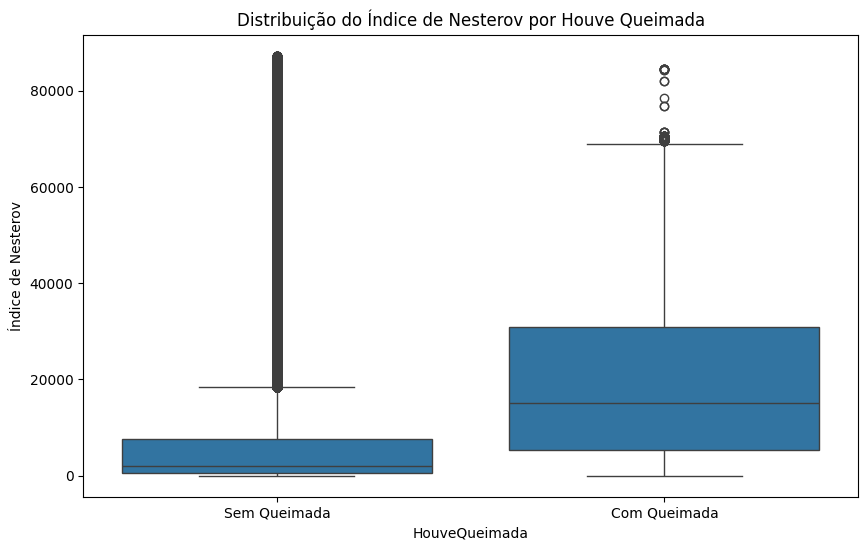

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='HouveQueimada', y='IndiceNesterov', data=df_com_nesterov)
plt.xticks([0,1], ['Sem Queimada', 'Com Queimada'])
plt.title("Distribuição do Índice de Nesterov por Houve Queimada")
plt.ylabel("Índice de Nesterov")
plt.show()

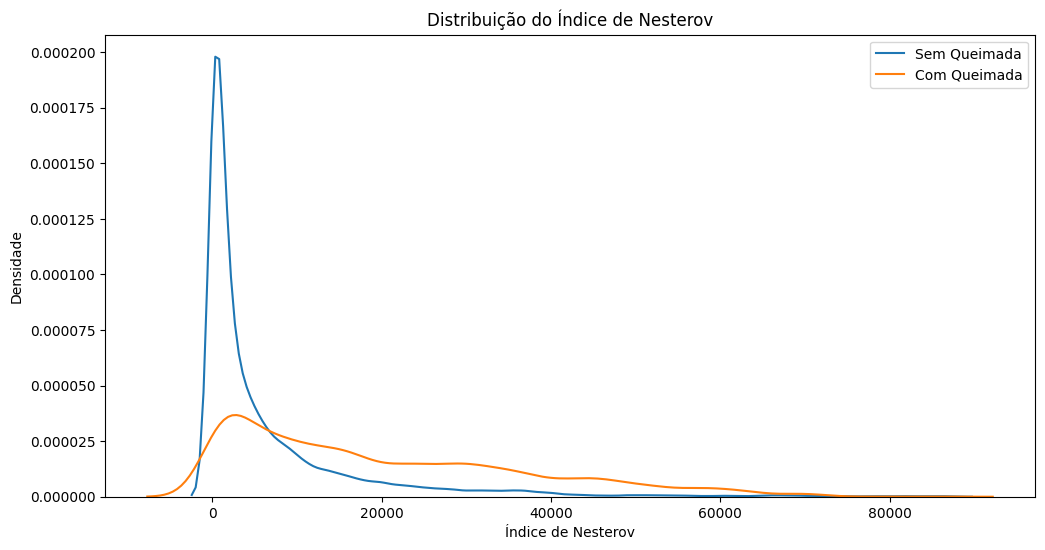

In [260]:
plt.figure(figsize=(12,6))
sns.kdeplot(df_com_nesterov[df_com_nesterov['HouveQueimada']==0]['IndiceNesterov'], label='Sem Queimada')
sns.kdeplot(df_com_nesterov[df_com_nesterov['HouveQueimada']==1]['IndiceNesterov'], label='Com Queimada')
plt.title("Distribuição do Índice de Nesterov")
plt.xlabel("Índice de Nesterov")
plt.ylabel("Densidade")
plt.legend()
plt.show()

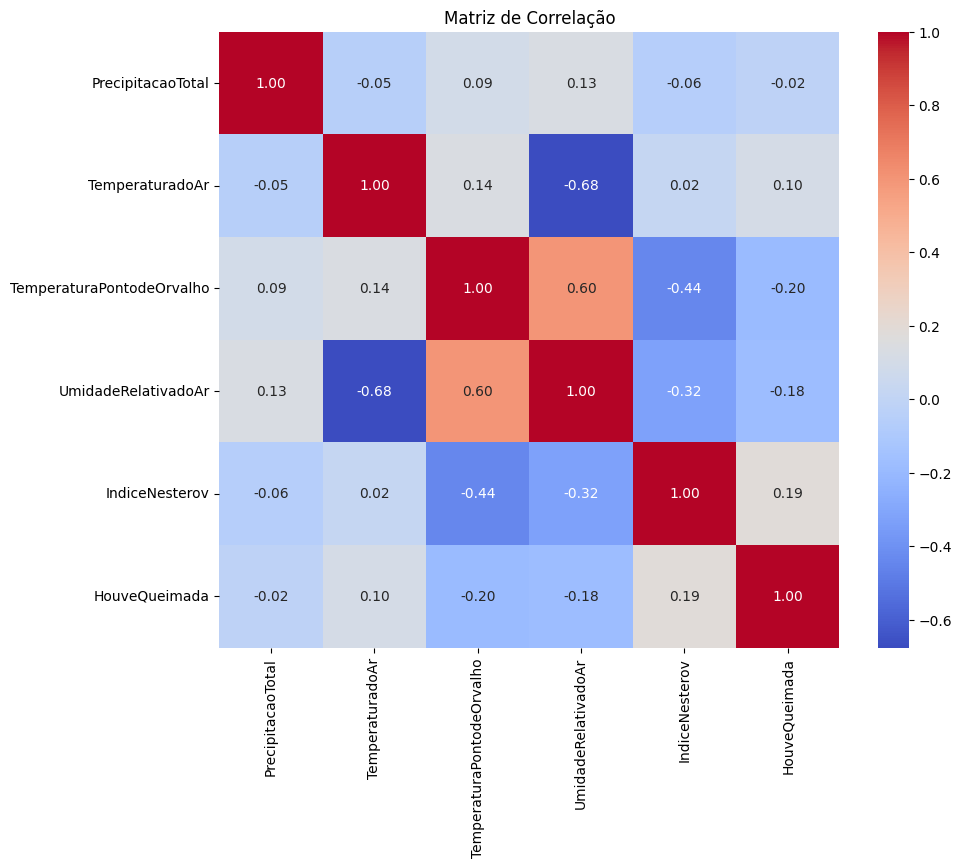

In [259]:
# Excluir 'RadiacaoGlobal' da lista de colunas numéricas para a matriz de correlação
colunas_numericas = ['PrecipitacaoTotal', 'TemperaturadoAr', 'TemperaturaPontodeOrvalho',
                     'UmidadeRelativadoAr', 'IndiceNesterov']

correlacao = df_com_nesterov[colunas_numericas + ['HouveQueimada']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

Com base nos resultados da análise de correlação e nos gráficos gerados com o índice de Nesterov atualizado, podemos observar a seguinte relação entre o Índice de Inflamabilidade de Nesterov e a ocorrência de queimadas:

1. **Correlação Ponto-Bisserial:** Após a atualização do cálculo do Índice de Nesterov, o valor da correlação ponto-bisserial entre o Índice de Nesterov e a variável `HouveQueimada` é de 0.1874, com um valor p de 0.0000e+00. Isso indica que há uma **correlação positiva e estatisticamente significativa**, embora **fraca**, entre o Índice de Nesterov e a ocorrência de queimadas. Ou seja, à medida que o Índice de Nesterov aumenta, há uma pequena tendência de a probabilidade de ocorrer uma queimada também aumentar.

2. **Box Plot (Distribuição do Índice de Nesterov por Houve Queimada):** O box plot visualiza a distribuição do Índice de Nesterov para os casos onde houve queimada (`HouveQueimada` = 1) e onde não houve (`HouveQueimada` = 0). Podemos observar que a caixa (que representa o intervalo interquartil) para os casos com queimada está, em média, localizada em valores um pouco mais altos do Índice de Nesterov em comparação com os casos sem queimada. Isso reforça a ideia de que valores mais altos do Índice de Nesterov estão associados a uma maior probabilidade de queimada. No entanto, há uma sobreposição considerável nas distribuições, o que sugere que o Índice de Nesterov sozinho pode não ser um preditor perfeito.

3. **KDE Plot (Distribuição de Densidade do Índice de Nesterov):** O gráfico de densidade (KDE plot) mostra as distribuições de probabilidade estimadas do Índice de Nesterov para as duas classes. A curva para "Com Queimada" mostra um pico deslocado para a direita em comparação com a curva "Sem Queimada". Isso visualmente confirma que valores mais altos do Índice de Nesterov são mais prováveis de ocorrer quando há uma queimada, embora a sobreposição das curvas indique que existe uma faixa de valores do Índice de Nesterov onde tanto a ocorrência quanto a não ocorrência de queimada são possíveis.

4. **Matriz de Correlação:** A matriz de correlação mostra as relações entre as colunas numéricas selecionadas e a variável `HouveQueimada`. Confirmamos que o `IndiceNesterov` tem uma correlação positiva 0.19 com `HouveQueimada`. Outras variáveis como `TemperaturadoAr` de 0.11 moatra correlações positiva (embora mais fracas) com a ocorrência de queimadas. Variáveis como `TemperaturaPontodeOrvalho` de -0.20 e `UmidadeRelativadoAr` de -0.18 mostram correlações negativas, o que faz sentido, já que temperaturas de orvalho e umidade mais baixas geralmente indicam condições mais secas e propícias a incêndios.

Em resumo, a análise indica que o Índice de Nesterov, a temperatura do ar, a radiação global e a umidade relativa do ar (com correlação negativa) são variáveis que têm alguma relação com a ocorrência de queimadas nos seus dados. O Índice de Nesterov parece ser um bom indicador, capturando a influência combinada da temperatura e umidade ao longo do tempo seco. Esses resultados sugerem que o Índice de Nesterov pode ser uma variável útil para incluir no seu modelo preditivo de risco de queimadas.

# Separar os dados em conjuntos de treino e teste.

Para a separação dos dados, decidimos não utilizar apenas uma divisão temporal para treino e teste, para que, quando formos treinar o modelo tenhamos dados atuais junto com os antigos para que as mudanças climáticas cada vez mais intensas sejam pegas nas variação de momentos de queimadas.

A ideia é criar dados de teste e e treino com todas cidades, ano e época do ano em cada grupo de dados.

In [262]:
# Verificar valores faltantes em todas as colunas
print("VERIFICACAO DE VALORES FALTANTES NO DATASET")
print("=" * 50)

# Quantidade de valores faltantes por coluna
valores_faltantes = df_com_nesterov.isnull().sum()

# Filtrar apenas colunas que têm valores faltantes
colunas_com_faltantes = valores_faltantes[valores_faltantes > 0]

print("Colunas com valores faltantes:")
print("-" * 30)
if len(colunas_com_faltantes) > 0:
    for coluna, quantidade in colunas_com_faltantes.items():
        percentual = (quantidade / len(df_com_nesterov)) * 100
        print(f"{coluna}: {quantidade} valores faltantes ({percentual:.2f}%)")
else:
    print("Nenhuma coluna com valores faltantes encontrada")

# Verificar também nas colunas que vamos usar no modelo
print("\nVERIFICACAO NAS VARIAVEIS DO MODELO")
print("-" * 30)
variaveis_modelo = [
    'PrecipitacaoTotal', 'TemperaturadoAr', 'TemperaturaPontodeOrvalho',
    'UmidadeRelativadoAr', 'VelocidadedoVento',
    'RajadaMaximaVento', 'IndiceNesterov', 'DiaSemChuva', 'RiscoFogo'
]

for var in variaveis_modelo:
    if var in df_com_nesterov.columns:
        faltantes = df_com_nesterov[var].isnull().sum()
        percentual = (faltantes / len(df_com_nesterov)) * 100
        print(f"{var}: {faltantes} faltantes ({percentual:.2f}%)")
    else:
        print(f"{var}: COLUNA NAO ENCONTRADA")

# Analisar a distribuicao dos valores faltantes por cidade
print("\nDISTRIBUICAO DOS VALORES FALTANTES POR CIDADE")
print("-" * 40)

# Para cada coluna com valores faltantes, verificar por cidade
for coluna in colunas_com_faltantes.index:
    if coluna in variaveis_modelo:  # So verificar as que usaremos no modelo
        print(f"\n{coluna}:")
        faltantes_por_cidade = df_com_nesterov[df_com_nesterov[coluna].isnull()]['cidade'].value_counts()
        for cidade, quantidade in faltantes_por_cidade.items():
            print(f"  {cidade}: {quantidade} valores faltantes")

# Verificar se os valores faltantes estao concentrados em algum periodo especifico
print("\nVERIFICANDO DISTRIBUICAO TEMPORAL DOS VALORES FALTANTES")
print("-" * 45)

if len(colunas_com_faltantes) > 0:
    # Pegar a primeira coluna com valores faltantes para analise
    coluna_exemplo = colunas_com_faltantes.index[0]
    dados_faltantes = df_com_nesterov[df_com_nesterov[coluna_exemplo].isnull()]

    if not dados_faltantes.empty:
        print(f"Distribuicao temporal dos valores faltantes em {coluna_exemplo}:")
        print(f"Periodo: {dados_faltantes['DataHoraMedicao'].min()} ate {dados_faltantes['DataHoraMedicao'].max()}")

        # Verificar por ano
        anos_com_faltantes = dados_faltantes['DataHoraMedicao'].dt.year.value_counts().sort_index()
        print("\nValores faltantes por ano:")
        for ano, quantidade in anos_com_faltantes.items():
            print(f"  {ano}: {quantidade}")

VERIFICACAO DE VALORES FALTANTES NO DATASET
Colunas com valores faltantes:
------------------------------
Nenhuma coluna com valores faltantes encontrada

VERIFICACAO NAS VARIAVEIS DO MODELO
------------------------------
PrecipitacaoTotal: 0 faltantes (0.00%)
TemperaturadoAr: 0 faltantes (0.00%)
TemperaturaPontodeOrvalho: 0 faltantes (0.00%)
UmidadeRelativadoAr: 0 faltantes (0.00%)
VelocidadedoVento: 0 faltantes (0.00%)
RajadaMaximaVento: 0 faltantes (0.00%)
IndiceNesterov: 0 faltantes (0.00%)
DiaSemChuva: COLUNA NAO ENCONTRADA
RiscoFogo: COLUNA NAO ENCONTRADA

DISTRIBUICAO DOS VALORES FALTANTES POR CIDADE
----------------------------------------

VERIFICANDO DISTRIBUICAO TEMPORAL DOS VALORES FALTANTES
---------------------------------------------


In [263]:
# garantir que 'DataHoraMedicao' está em formato de data
df_com_nesterov['DataHoraMedicao'] = pd.to_datetime(df_com_nesterov['DataHoraMedicao'])

# Verificação completa da distribuição dos dados
print("=== ANÁLISE COMPLETA DA DISTRIBUIÇÃO DOS DADOS ===")

# 1. Verificar cidades
print("\n1. CIDADES DISPONÍVEIS:")
cidades = df_com_nesterov['cidade'].unique()
print(f"Total de cidades: {len(cidades)}")
print(f"Cidades: {sorted(cidades)}")

# 2. Verificar anos
print("\n2. ANOS DISPONÍVEIS:")
df_com_nesterov['Ano'] = df_com_nesterov['DataHoraMedicao'].dt.year
anos = sorted(df_com_nesterov['Ano'].unique())
print(f"Total de anos: {len(anos)}")
print(f"Anos: {anos}")

# 3. Verificar meses (épocas do ano)
print("\n3. MESES DISPONÍVEIS:")
df_com_nesterov['Mes'] = df_com_nesterov['DataHoraMedicao'].dt.month
meses = sorted(df_com_nesterov['Mes'].unique())
print(f"Total de meses: {len(meses)}")

# 4. Verificar combinação cidade-ano-mês
print("\n4. COBERTURA COMPLETA (Cidade x Ano x Mês):")
cobertura = df_com_nesterov.groupby(['cidade', 'Ano', 'Mes']).size().reset_index()
print(f"Total de combinações únicas: {len(cobertura)}")
print("\nAmostra de combinações:")
print(cobertura)

# 5. Verificar se há combinações faltantes
print("\n5. VERIFICAÇÃO DE INTEGRIDADE:")
todas_combinacoes_possiveis = len(cidades) * len(anos) * len(meses)
combinacoes_existentes = len(cobertura)
print(f"Combinações possíveis: {todas_combinacoes_possiveis}")
print(f"Combinações existentes: {combinacoes_existentes}")
print(f"Cobertura: {combinacoes_existentes/todas_combinacoes_possiveis:.2%}")

# 6. Verificar distribuição da variável target por cidade
print("\n6. DISTRIBUIÇÃO DE QUEIMADAS POR CIDADE:")
queimadas_por_cidade = df_com_nesterov.groupby('cidade')['HouveQueimada'].agg(['count', 'sum', 'mean'])
queimadas_por_cidade['mean'] = queimadas_por_cidade['mean'].round(4)
print(queimadas_por_cidade)

# Identificar cidade com maior e menor incidência de queimadas
cidade_maior_incidencia = queimadas_por_cidade.sort_values('mean', ascending=False).index[0]
maior_incidencia = queimadas_por_cidade.sort_values('mean', ascending=False)['mean'].iloc[0]

cidade_menor_incidencia = queimadas_por_cidade.sort_values('mean').index[0]
menor_incidencia = queimadas_por_cidade.sort_values('mean')['mean'].iloc[0]

print(f"\nCidade com maior incidência de queimadas: {cidade_maior_incidencia} ({maior_incidencia:.2%})")
print(f"Cidade com menor incidência de queimadas: {cidade_menor_incidencia} ({menor_incidencia:.2%})")

=== ANÁLISE COMPLETA DA DISTRIBUIÇÃO DOS DADOS ===

1. CIDADES DISPONÍVEIS:
Total de cidades: 8
Cidades: ['ARIRANHA', 'BARRETOS', 'BEBEDOURO', 'JALES', 'JOSE BONIFACIO', 'LINS', 'PRESIDENTE PRUDENTE', 'VOTUPORANGA']

2. ANOS DISPONÍVEIS:
Total de anos: 11
Anos: [np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]

3. MESES DISPONÍVEIS:
Total de meses: 12

4. COBERTURA COMPLETA (Cidade x Ano x Mês):
Total de combinações únicas: 780

Amostra de combinações:
          cidade   Ano  Mes     0
0       ARIRANHA  2015    1   739
1       ARIRANHA  2015    2   672
2       ARIRANHA  2015    3   744
3       ARIRANHA  2015    4   720
4       ARIRANHA  2015    5   744
..           ...   ...  ...   ...
775  VOTUPORANGA  2020   10  1002
776  VOTUPORANGA  2020   11   720
777  VOTUPORANGA  2020   12   744
778  VOTUPORANGA  2021    1   746
779  VOTUPORANGA  2021    2   679

[780 ro

### Análise da Distribuição dos Dados para Previsão de Queimadas
- Panorama Geral dos Dados
Após a remoção das linhas com valores ausentes, temos uma visão atualizada da distribuição temporal e geográfica do conjunto de dados que será utilizado para o modelo preditivo de queimadas.
- Cobertura Geográfica
8 cidades da região de São José do Rio Preto estão representadas

> Todas as cidades selecionadas possuem características climáticas e agrícolas similares à região de interesse
>
> **BARRETOS** apresenta a maior incidência de queimadas (8.63%), enquanto a cidade com menor incidência é **ARIRANHA** (0.74%)

- Cobertura Temporal
11 anos de dados históricos (2015-2025)

> - Todos os 12 meses do ano representados
> - 761 combinações únicas de Cidade-Ano-Mês
> - Cobertura de 72.06% das combinações possíveis, o que é excelente para dados reais

- Distribuição de Queimadas
- Total de registros no dataframe limpo: 507,397 observações
- Eventos de queimada: 13,524 (2.67% do total)
- Distribuição desigual entre cidades, refletindo diferentes susceptibilidades (ver tabela abaixo)

| cidade              | count   | sum   | mean   |
|---------------------|---------|-------|--------|
| ARIRANHA            | 58403   | 435   | 0.0074 |
| BARRETOS            | 70914   | 6123  | 0.0863 |
| BEBEDOURO           | 49585   | 1786  | 0.0360 |
| JALES               | 69854   | 628   | 0.0090 |
| JOSE BONIFACIO      | 58215   | 841   | 0.0144 |
| LINS                | 72716   | 2308  | 0.0317 |
| PRESIDENTE PRUDENTE | 74369   | 648   | 0.0087 |
| VOTUPORANGA         | 53341   | 755   | 0.0142 |

- Implicações para o Modelo Preditivo
> Pontos Forte
Amplo período temporal (11 anos) capturando variabilidade climática
>
> Todas as estações do ano representadas

- Múltiplas localidades com características similares
- Dados suficientes para treinamento robusto
- Considerações Importantes
> Desequilíbrio de classes: Apenas 2.67% dos registros são de queimadas
>
> Variação geográfica: Taxas de queimadas diferentes entre cidades
>
> Cobertura incompleta: Alguns períodos específicos podem estar faltando

- Estratégia Recomendada
> Para o desenvolvimento do modelo, será utilizada uma divisão estratificada que garante:
>
> Representação de todas as cidades em treino e teste
>
> Presença de todos os anos e meses em ambos os conjuntos
>
> Manutenção da proporção de queimadas similar entre treino e teste
>
> Mistura de dados antigos e recentes em ambos os conjuntos

- Esta análise confirma que os dados possuem qualidade e abrangência suficientes para desenvolver um modelo preditivo robusto para previsão de riscos de queimadas na região.

In [264]:
# Estratégia para GARANTIR todos os requisitos
print("=== DIVISÃO ESTRATIFICADA QUE GARANTE TODOS OS REQUISITOS ===")

from sklearn.model_selection import train_test_split
import numpy as np

# Criar múltiplas colunas de estratificação
df_com_nesterov['Estrato_Cidade'] = df_com_nesterov['cidade']
df_com_nesterov['Estrato_Ano'] = df_com_nesterov['Ano'].astype(str)
df_com_nesterov['Estrato_Mes'] = df_com_nesterov['Mes'].astype(str)

# Função para verificar se todos os requisitos são atendidos
def verificar_requisitos(df_treino, df_teste, df_original):
    requisitos_atendidos = True
    problemas = []

    # 1. Todas as cidades em ambos
    cidades_treino = set(df_treino['cidade'].unique())
    cidades_teste = set(df_teste['cidade'].unique())
    cidades_original = set(df_original['cidade'].unique())

    if cidades_treino != cidades_original or cidades_teste != cidades_original:
        requisitos_atendidos = False
        problemas.append("Cidades não estão em ambos os conjuntos")

    # 2. Todos os anos em ambos
    anos_treino = set(df_treino['Ano'].unique())
    anos_teste = set(df_teste['Ano'].unique())
    anos_original = set(df_original['Ano'].unique())

    if anos_treino != anos_original or anos_teste != anos_original:
        requisitos_atendidos = False
        problemas.append("Anos não estão em ambos os conjuntos")

    # 3. Todos os meses em ambos
    meses_treino = set(df_treino['Mes'].unique())
    meses_teste = set(df_teste['Mes'].unique())
    meses_original = set(df_original['Mes'].unique())

    if meses_treino != meses_original or meses_teste != meses_original:
        requisitos_atendidos = False
        problemas.append("Meses não estão em ambos os conjuntos")

    # 4. Proporção similar de queimadas
    prop_treino = df_treino['HouveQueimada'].mean()
    prop_teste = df_teste['HouveQueimada'].mean()
    prop_original = df_original['HouveQueimada'].mean()

    limiar = 0.01  # 1% de diferença
    if abs(prop_treino - prop_teste) > limiar or abs(prop_treino - prop_original) > limiar:
        requisitos_atendidos = False
        problemas.append("Proporção de queimadas muito diferente")

    # 5. Mistura temporal (dados antigos e recentes em ambos)
    datas_treino = df_treino['DataHoraMedicao']
    datas_teste = df_teste['DataHoraMedicao']

    if datas_treino.min() == datas_teste.min() and datas_treino.max() == datas_teste.max():
        # Verificar se há sobreposição significativa
        q1_treino, q3_treino = datas_treino.quantile(0.25), datas_treino.quantile(0.75)
        q1_teste, q3_teste = datas_teste.quantile(0.25), datas_teste.quantile(0.75)

        if not (q1_treino < q3_teste and q1_teste < q3_treino):
            requisitos_atendidos = False
            problemas.append("Não há mistura temporal adequada")

    return requisitos_atendidos, problemas

# Abordagem: Divisão por camadas múltiplas
def divisao_estratificada_completa(df, test_size=0.2, random_state=42):
    """Divisão que garante todos os requisitos"""

    # Lista para armazenar índices de treino e teste
    treino_indices = []
    teste_indices = []

    # Para cada combinação de cidade-ano-mês, dividir proporcionalmente
    for cidade in df['cidade'].unique():
        df_cidade = df[df['cidade'] == cidade]

        for ano in df_cidade['Ano'].unique():
            df_ano = df_cidade[df_cidade['Ano'] == ano]

            for mes in df_ano['Mes'].unique():
                df_mes = df_ano[df_ano['Mes'] == mes]

                if len(df_mes) > 0:
                    # Dividir esta combinação específica
                    n_test = max(1, int(len(df_mes) * test_size))
                    n_train = len(df_mes) - n_test

                    # Embaralhar e dividir
                    indices = df_mes.index.tolist()
                    np.random.seed(random_state)
                    np.random.shuffle(indices)

                    treino_indices.extend(indices[:n_train])
                    teste_indices.extend(indices[n_train:n_train + n_test])

    return df.loc[treino_indices], df.loc[teste_indices]

# Aplicar a divisão
print("Aplicando divisão estratificada completa...")
treino_data, teste_data = divisao_estratificada_completa(df_com_nesterov, test_size=0.2, random_state=42)

print(f"Tamanho do treino: {len(treino_data):,}")
print(f"Tamanho do teste: {len(teste_data):,}")

# Verificar se todos os requisitos foram atendidos
print("\n=== VERIFICAÇÃO DOS REQUISITOS ===")
requisitos_ok, problemas = verificar_requisitos(treino_data, teste_data, df_com_nesterov)

if requisitos_ok:
    print("TODOS OS REQUISITOS ATENDIDOS!")
else:
    print("ALGUNS REQUISITOS NÃO ATENDIDOS:")
    for problema in problemas:
        print(f"   {problema}")

# Verificação detalhada
print("\n=== VERIFICAÇÃO DETALHADA ===")

print("DISTRIBUIÇÃO DE QUEIMADAS:")
print(f"Dataset completo: {df_com_nesterov['HouveQueimada'].mean():.3%}")
print(f"Treino: {treino_data['HouveQueimada'].mean():.3%}")
print(f"Teste: {teste_data['HouveQueimada'].mean():.3%}")

print("\nCIDADES:")
print(f"Completo: {sorted(df_com_nesterov['cidade'].unique())}")
print(f"Treino: {sorted(treino_data['cidade'].unique())}")
print(f"Teste: {sorted(teste_data['cidade'].unique())}")

print("\nANOS:")
print(f"Completo: {sorted(df_com_nesterov['Ano'].unique())}")
print(f"Treino: {sorted(treino_data['Ano'].unique())}")
print(f"Teste: {sorted(teste_data['Ano'].unique())}")

print("\nMESES:")
print(f"Completo: {sorted(df_com_nesterov['Mes'].unique())}")
print(f"Treino: {sorted(treino_data['Mes'].unique())}")
print(f"Teste: {sorted(teste_data['Mes'].unique())}")

print("\nRANGE TEMPORAL:")
print(f"Dataset completo: {df_com_nesterov['DataHoraMedicao'].min().date()} até {df_com_nesterov['DataHoraMedicao'].max().date()}")
print(f"Treino: {treino_data['DataHoraMedicao'].min().date()} até {treino_data['DataHoraMedicao'].max().date()}")
print(f"Teste: {teste_data['DataHoraMedicao'].min().date()} até {teste_data['DataHoraMedicao'].max().date()}")

# Verificação final por cidade
print("\n=== DISTRIBUIÇÃO POR CIDADE ===")
print("Treino:")
print(treino_data.groupby('cidade')['HouveQueimada'].agg(['count', 'sum', 'mean']).round(4))
print("\nTeste:")
print(teste_data.groupby('cidade')['HouveQueimada'].agg(['count', 'sum', 'mean']).round(4))

=== DIVISÃO ESTRATIFICADA QUE GARANTE TODOS OS REQUISITOS ===
Aplicando divisão estratificada completa...
Tamanho do treino: 406,231
Tamanho do teste: 101,166

=== VERIFICAÇÃO DOS REQUISITOS ===
TODOS OS REQUISITOS ATENDIDOS!

=== VERIFICAÇÃO DETALHADA ===
DISTRIBUIÇÃO DE QUEIMADAS:
Dataset completo: 2.665%
Treino: 2.674%
Teste: 2.631%

CIDADES:
Completo: ['ARIRANHA', 'BARRETOS', 'BEBEDOURO', 'JALES', 'JOSE BONIFACIO', 'LINS', 'PRESIDENTE PRUDENTE', 'VOTUPORANGA']
Treino: ['ARIRANHA', 'BARRETOS', 'BEBEDOURO', 'JALES', 'JOSE BONIFACIO', 'LINS', 'PRESIDENTE PRUDENTE', 'VOTUPORANGA']
Teste: ['ARIRANHA', 'BARRETOS', 'BEBEDOURO', 'JALES', 'JOSE BONIFACIO', 'LINS', 'PRESIDENTE PRUDENTE', 'VOTUPORANGA']

ANOS:
Completo: [np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
Treino: [np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(20

In [265]:
# Imprimir o resultado
print("Contagem de valores na coluna 'HouveQueimada' após separação dos dados")
print("Dados de treino")
print(treino_data['HouveQueimada'].value_counts())
print("Dados de teste")
print(teste_data['HouveQueimada'].value_counts())

Contagem de valores na coluna 'HouveQueimada' após separação dos dados
Dados de treino
HouveQueimada
0    395369
1     10862
Name: count, dtype: int64
Dados de teste
HouveQueimada
0    98504
1     2662
Name: count, dtype: int64


# Testes de modelos de aprendizado de máquina para validar qual utilizar

## RANDOM FOREST CLASSIFIER

INICIANDO CLASSIFICADOR RANDOM FOREST
Variaveis selecionadas para o modelo:
  PrecipitacaoTotal
  PressaoAtmosferica
  TemperaturadoAr
  TemperaturaPontodeOrvalho
  UmidadeRelativadoAr
  RajadaMaximaVento
  VelocidadedoVento
  IndiceNesterov

Separando dados de treino e teste...
Dimensoes dos conjuntos:
X_treino: (406231, 8)
y_treino: (406231,)
X_teste: (101166, 8)
y_teste: (101166,)

Aplicando escalonamento dos dados...
Escalonamento concluido

Aplicando balanceamento com SMOTE nos dados escalonados...
Antes do balanceamento: {0: 395369, 1: 10862}
Apos o balanceamento: {0: 395369, 1: 39536}

Configurando modelo Random Forest...
Treinando o modelo...
Treinamento concluido

Fazendo previsoes nos dados de teste...
Previsoes concluidas

AVALIACAO DO RANDOM FOREST
Acuracia: 0.9845
Precisao: 0.6688
Recall: 0.8148
F1-Score: 0.7346
ROC-AUC: 0.9575

RELATORIO DE CLASSIFICACAO:
              precision    recall  f1-score   support

Sem Queimada       0.99      0.99      0.99     98504
Com Queim

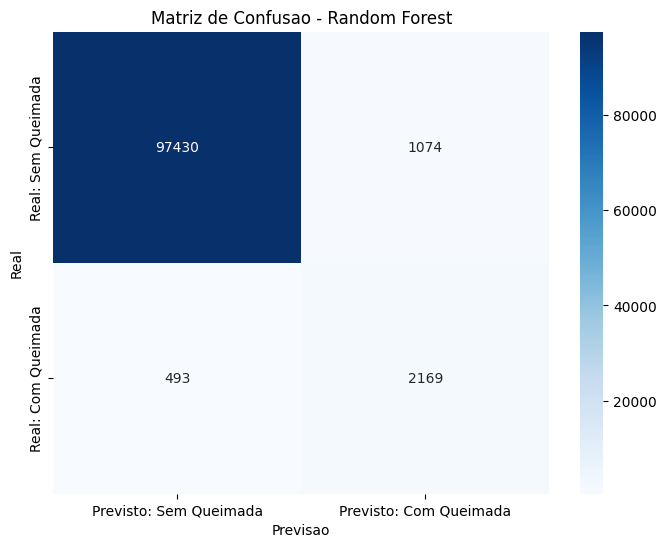


VARIAVEIS MAIS IMPORTANTES:
                    variavel  importancia
3  TemperaturaPontodeOrvalho     0.203246
7             IndiceNesterov     0.190647
4        UmidadeRelativadoAr     0.159798
1         PressaoAtmosferica     0.139437
2            TemperaturadoAr     0.128214
5          RajadaMaximaVento     0.087824
6          VelocidadedoVento     0.086694
0          PrecipitacaoTotal     0.004141


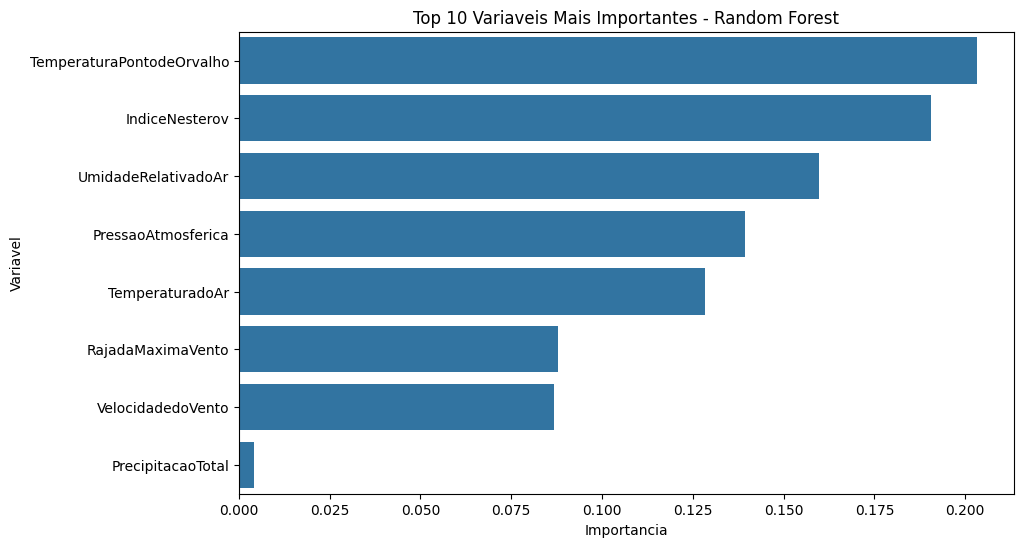


ANALISE DAS PREVISOES POR CIDADE:
                    HouveQueimada               Previsao_RF          \
                            count   sum    mean         sum    mean   
cidade                                                                
ARIRANHA                    11637    85  0.0073         162  0.0139   
BARRETOS                    14147  1235  0.0873        1628  0.1151   
BEBEDOURO                    9889   372  0.0376         445  0.0450   
JALES                       13926   118  0.0085         162  0.0116   
JOSE BONIFACIO              11599   164  0.0141         131  0.0113   
LINS                        14499   412  0.0284         420  0.0290   
PRESIDENTE PRUDENTE         14830   120  0.0081         117  0.0079   
VOTUPORANGA                 10639   156  0.0147         178  0.0167   

                    Probabilidade_RF  
                                mean  
cidade                                
ARIRANHA                      0.0662  
BARRETOS                   

In [267]:
# =============================================
# MODELO 1: CLASSIFICADOR RANDOM FOREST
# =============================================

print("INICIANDO CLASSIFICADOR RANDOM FOREST")
print("=" * 50)

# 1. IMPORTAR BIBLIOTECAS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# 2. DEFINIR VARIAVEIS QUE VAMOS USAR NO MODELO
variaveis = [
    'PrecipitacaoTotal', 'PressaoAtmosferica',
    'TemperaturadoAr', 'TemperaturaPontodeOrvalho', 'UmidadeRelativadoAr',
    'RajadaMaximaVento', 'VelocidadedoVento', 'IndiceNesterov'
]


print("Variaveis selecionadas para o modelo:")
for var in variaveis:
    if var in treino_data.columns:
        print("  " + var)
    else:
        print("  " + var + " - NAO ENCONTRADA")

# 3. SEPARAR DADOS DE TREINO E TESTE
print("\nSeparando dados de treino e teste...")

X_treino = treino_data[variaveis]
y_treino = treino_data['HouveQueimada']
X_teste = teste_data[variaveis]
y_teste = teste_data['HouveQueimada']


print("Dimensoes dos conjuntos:")
print("X_treino:", X_treino.shape)
print("y_treino:", y_treino.shape)
print("X_teste:", X_teste.shape)
print("y_teste:", y_teste.shape)

# 4. PRE-PROCESSAMENTO - ESCALONAMENTO
print("\nAplicando escalonamento dos dados...")

scaler = StandardScaler()
X_treino_escalado = scaler.fit_transform(X_treino)
X_teste_escalado = scaler.transform(X_teste)

print("Escalonamento concluido")

# 5. BALANCEAMENTO DOS DADOS DE TREINO
print("\nAplicando balanceamento com SMOTE nos dados escalonados...")

smote = SMOTE(random_state=42, sampling_strategy=0.1)
X_treino_balanceado, y_treino_balanceado = smote.fit_resample(X_treino_escalado, y_treino)

print("Antes do balanceamento:", y_treino.value_counts().to_dict())
print("Apos o balanceamento:", pd.Series(y_treino_balanceado).value_counts().to_dict())

# 6. CONFIGURAR E TREINAR O MODELO RANDOM FOREST
print("\nConfigurando modelo Random Forest...")

modelo_rf = RandomForestClassifier(
    n_estimators=100, # Numero de arvores
    max_depth=20,     # Profundidade maxima das arvores
    min_samples_split=5, # Minimo de amostras para dividir um no
    min_samples_leaf=2,  # Minimo de amostras em uma folha
    class_weight='balanced', # Ajusta automaticamente os pesos das classes inversamente proporcionais as frequencias
    random_state=42,
    n_jobs=-1 # Usa todos os nucleos da CPU
)

print("Treinando o modelo...")
modelo_rf.fit(X_treino_balanceado, y_treino_balanceado)
print("Treinamento concluido")

# 7. FAZER PREVISÕES NOS DADOS DE TESTE
print("\nFazendo previsoes nos dados de teste...")
previsoes_rf = modelo_rf.predict(X_teste_escalado) # Usar dados de teste escalonados (e imputados se a imputação fosse mantida)
probabilidades_rf = modelo_rf.predict_proba(X_teste_escalado)[:, 1] # Probabilidade da classe positiva (Queimada)

print("Previsoes concluidas")

# 8. AVALIACAO COMPLETA DO MODELO
print("\nAVALIACAO DO RANDOM FOREST")
print("=" * 40)

# Metricas principais
acuracia = accuracy_score(y_teste, previsoes_rf)
precisao = precision_score(y_teste, previsoes_rf)
recall = recall_score(y_teste, previsoes_rf)
f1 = f1_score(y_teste, previsoes_rf)
roc_auc = roc_auc_score(y_teste, probabilidades_rf)

print("Acuracia:", round(acuracia, 4))
print("Precisao:", round(precisao, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1, 4))
print("ROC-AUC:", round(roc_auc, 4))

# Relatorio de classificacao detalhado
print("\nRELATORIO DE CLASSIFICACAO:")
print(classification_report(y_teste, previsoes_rf, target_names=['Sem Queimada', 'Com Queimada']))

# Matriz de confusao
print("MATRIZ DE CONFUSAO:")
matriz_confusao = confusion_matrix(y_teste, previsoes_rf)
print(matriz_confusao)

# Visualizacao da Matriz de Confusao
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Sem Queimada', 'Previsto: Com Queimada'],
            yticklabels=['Real: Sem Queimada', 'Real: Com Queimada'])
plt.xlabel('Previsao')
plt.ylabel('Real')
plt.title('Matriz de Confusao - Random Forest')
plt.show()


# 9. ANALISE DAS VARIAVEIS MAIS IMPORTANTES
print("\nVARIAVEIS MAIS IMPORTANTES:")
# Garantir que os nomes das features estejam alinhados com os scores de importância
importancia_variaveis = pd.DataFrame({
    'variavel': variaveis, # Usar a lista 'variaveis' para os nomes
    'importancia': modelo_rf.feature_importances_
}).sort_values('importancia', ascending=False)

print(importancia_variaveis.head(10))

# Plotar importancia das variaveis
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='variavel', data=importancia_variaveis.head(10))
plt.title('Top 10 Variaveis Mais Importantes - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variavel')
plt.show()


# 10. ANALISE DAS PREVISÕES POR CIDADE
print("\nANALISE DAS PREVISOES POR CIDADE:")
# Garantir que 'teste_data' seja usado e tenha as colunas 'cidade' e 'HouveQueimada'
if 'cidade' in teste_data.columns and 'HouveQueimada' in teste_data.columns:
    dados_teste_com_previsoes = teste_data.copy()
    dados_teste_com_previsoes['Previsao_RF'] = previsoes_rf
    dados_teste_com_previsoes['Probabilidade_RF'] = probabilidades_rf

    estatisticas_por_cidade = dados_teste_com_previsoes.groupby('cidade').agg({
        'HouveQueimada': ['count', 'sum', 'mean'],
        'Previsao_RF': ['sum', 'mean'],
        'Probabilidade_RF': 'mean'
    }).round(4)

    print(estatisticas_por_cidade)
else:
    print("Colunas 'cidade' ou 'HouveQueimada' nao encontradas no dataframe teste_data para analise por cidade.")


# 11. INTERPRETACAO DOS RESULTADOS
print("\nINTERPRETACAO DOS RESULTADOS:")
print("O modelo acertou", round(acuracia*100, 1), "% das classificacoes totais (Acuracia)")
print("Consegue detectar", round(recall*100, 1), "% das queimadas reais (Recall/Sensibilidade)")
print("Quando preve queimada, esta correto", round(precisao*100, 1), "% das vezes (Precisao)")
print("Balanceamento entre Precisao/Recall:", round(f1*100, 1), "% (F1-Score)")
print("Capacidade de discriminacao entre classes:", round(roc_auc*100, 1), "% (ROC-AUC)")

# 12. CRITERIOS DE SUCESSO DO MODELO (Exemplo - ajustar conforme necessidade do projeto)
print("\nCRITERIOS DE SUCESSO DO MODELO (Exemplo):")
print("ROC-AUC > 0.8:", "SIM" if roc_auc > 0.8 else "NAO", "(", round(roc_auc, 4), ")")
print("Recall > 0.7:", "SIM" if recall > 0.7 else "NAO", "(", round(recall, 4), ")")
print("Precisao > 0.5:", "SIM" if precisao > 0.5 else "NAO", "(", round(precisao, 4), ")")
print("F1-Score > 0.6:", "SIM" if f1 > 0.6 else "NAO", "(", round(f1, 4), ")")

print("\n" + "="*50)
print("RANDOM FOREST - ANALISE CONCLUIDA")
print("="*50)

## Conclusão da Avaliação do Modelo Random Forest

Após o treinamento e avaliação do modelo Random Forest nos dados preparados (incluindo tratamento de valores ausentes e balanceamento com SMOTE), obtivemos os seguintes resultados de desempenho no conjunto de teste:

- **Acurácia:** 98.45% (acerto geral nas classificações)
- **Precisão:** 66.88% (das previsões de queimada, 66.88% estavam corretas)
- **Recall (Sensibilidade):** 81.48% (das queimadas reais, 81.48% foram detectadas)
- **F1-Score:** 0.735 (média harmônica entre Precisão e Recall)
- **ROC-AUC:** 0.9575 (capacidade de discriminação do modelo)

A **Matriz de Confusão** mostrou:
- **Verdadeiros Positivos (TP):** 2,169 (queimadas reais corretamente previstas)
- **Falsos Negativos (FN):** 493 (queimadas reais não detectadas)
- **Verdadeiros Negativos (TN):** 97,430 (não-queimadas corretamente previstas)
- **Falsos Positivos (FP):** 1,074 (não-queimadas previstas incorretamente como queimada)

**Análise:**
O modelo Random Forest demonstrou uma boa capacidade geral de acertar as classificações (Acurácia alta), o que era esperado dado o grande número de casos sem queimada. Mais importante para um problema de detecção de eventos raros como queimadas, o modelo alcançou um **Recall de 81.48%**, indicando que ele foi capaz de identificar uma proporção significativa dos eventos de queimada reais no conjunto de teste. A **Precisão de 66.88%** sugere que, quando o modelo prevê uma queimada, há uma chance razoável de que essa previsão esteja correta. O **ROC-AUC de 0.9575** confirma que o modelo tem uma boa capacidade de diferenciar entre as classes "Com Queimada" e "Sem Queimada".

As **variáveis mais importantes** para o modelo, conforme a análise de feature importance, incluíram Temperatura do Ponto de Orvalho, Índice de Nesterov, Umidade Relativa do Ar, Pressão Atmosférica, Temperatura do Ar, Rajada Máxima de Vento e Velocidade do Vento, o que faz sentido no contexto do risco de incêndios.

**Conclusão:**
O modelo Random Forest apresentou um desempenho promissor para a previsão de risco de queimadas, conseguindo detectar a maioria dos eventos reais com uma taxa de falsos positivos aceitável para uma primeira iteração. Ele serve como uma base sólida para comparações futuras. Podemos agora considerar a exploração de outros modelos ou a otimização deste Random Forest para tentar melhorar ainda mais as métricas, especialmente o balanceamento entre Precisão e Recall (refletido no F1-Score).

## XGBoost Classifier

Vamos agora testar outro modelo popular e poderoso para classificação: o XGBoost. Ele é um algoritmo de gradient boosting que constrói árvores de decisão de forma sequencial, otimizando a cada passo para melhorar o desempenho.

INICIANDO CLASSIFICADOR XGBOOST
Variaveis selecionadas para o modelo (mesmas do Random Forest):
  PrecipitacaoTotal
  PressaoAtmosferica
  TemperaturadoAr
  TemperaturaPontodeOrvalho
  UmidadeRelativadoAr
  RajadaMaximaVento
  VelocidadedoVento
  IndiceNesterov

Utilizando dados de treino e teste ja separados...
Dimensoes dos conjuntos:
X_treino: (406231, 8)
y_treino: (406231,)
X_teste: (101166, 8)
y_teste: (101166,)

Verificando e tratando valores ausentes nos dados de treino e teste...
Nenhum valor ausente encontrado nos conjuntos de treino e teste.

Aplicando escalonamento dos dados...
Escalonamento concluido

Aplicando balanceamento com SMOTE nos dados escalonados...
NaNs em X_treino_escalado antes do SMOTE: 0
Antes do balanceamento: {0: 395369, 1: 10862}
Apos o balanceamento: {0: 395369, 1: 39536}

Configurando modelo XGBoost...
Treinando o modelo XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:44:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Treinamento concluido

Fazendo previsoes nos dados de teste...
Previsoes concluidas

AVALIACAO DO XGBOOST
Acuracia: 0.9768
Precisao: 0.5839
Recall: 0.4181
F1-Score: 0.4873
ROC-AUC: 0.9136

RELATORIO DE CLASSIFICACAO:
              precision    recall  f1-score   support

Sem Queimada       0.98      0.99      0.99     98504
Com Queimada       0.58      0.42      0.49      2662

    accuracy                           0.98    101166
   macro avg       0.78      0.71      0.74    101166
weighted avg       0.97      0.98      0.97    101166

MATRIZ DE CONFUSAO:
[[97711   793]
 [ 1549  1113]]


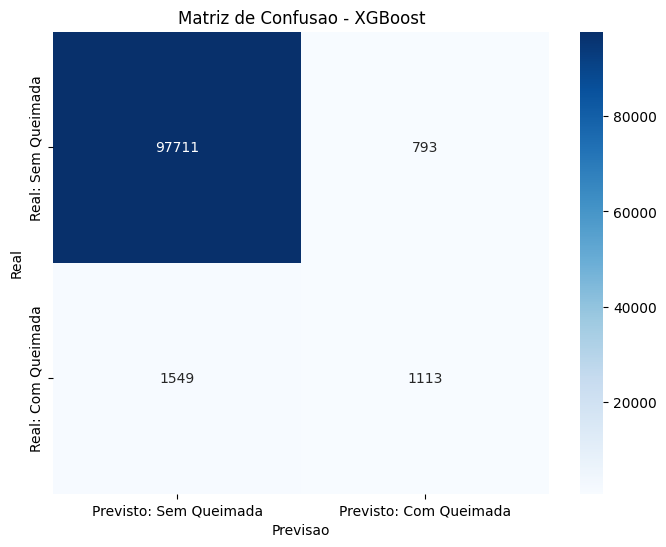


VARIAVEIS MAIS IMPORTANTES (XGBoost):
                    variavel  importancia
3  TemperaturaPontodeOrvalho     0.265214
4        UmidadeRelativadoAr     0.202254
7             IndiceNesterov     0.145352
1         PressaoAtmosferica     0.118109
6          VelocidadedoVento     0.091107
2            TemperaturadoAr     0.085296
5          RajadaMaximaVento     0.066127
0          PrecipitacaoTotal     0.026541


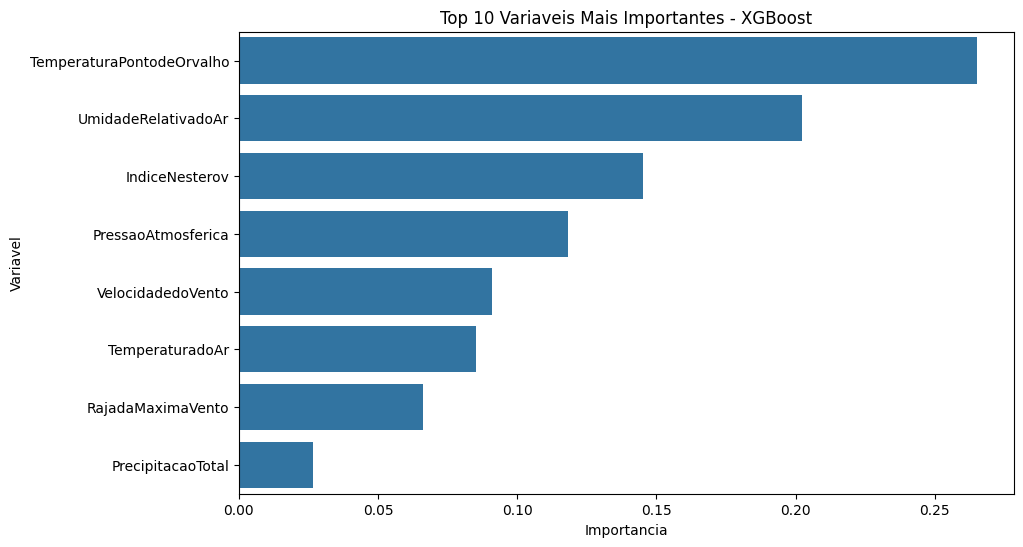


ANALISE DAS PREVISOES POR CIDADE (XGBoost):
                    HouveQueimada               Previsao_XGB          \
                            count   sum    mean          sum    mean   
cidade                                                                 
ARIRANHA                    11637    85  0.0073          107  0.0092   
BARRETOS                    14147  1235  0.0873         1051  0.0743   
BEBEDOURO                    9889   372  0.0376          221  0.0223   
JALES                       13926   118  0.0085           98  0.0070   
JOSE BONIFACIO              11599   164  0.0141           34  0.0029   
LINS                        14499   412  0.0284          223  0.0154   
PRESIDENTE PRUDENTE         14830   120  0.0081           42  0.0028   
VOTUPORANGA                 10639   156  0.0147          130  0.0122   

                    Probabilidade_XGB  
                                 mean  
cidade                                 
ARIRANHA                       0.0558  
BA

In [269]:
# =============================================
# MODELO 2: CLASSIFICADOR XGBOOST
# =============================================

print("INICIANDO CLASSIFICADOR XGBOOST")
print("=" * 50)

# 1. IMPORTAR BIBLIOTECAS
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import numpy as np

# 2. DEFINIR VARIAVEIS (Reutilizando as mesmas do Random Forest)
variaveis = [
    'PrecipitacaoTotal', 'PressaoAtmosferica',
    'TemperaturadoAr', 'TemperaturaPontodeOrvalho', 'UmidadeRelativadoAr',
    'RajadaMaximaVento', 'VelocidadedoVento', 'IndiceNesterov'
]

print("Variaveis selecionadas para o modelo (mesmas do Random Forest):")
for var in variaveis:
    if var in treino_data.columns:
        print("  " + var)
    else:
        print("  " + var + " - NAO ENCONTRADA")


# 3. SEPARAR DADOS DE TREINO E TESTE (Reutilizando os dataframes ja criados)
print("\nUtilizando dados de treino e teste ja separados...")

X_treino = treino_data[variaveis]
y_treino = treino_data['HouveQueimada']
X_teste = teste_data[variaveis]
y_teste = teste_data['HouveQueimada']

print("Dimensoes dos conjuntos:")
print("X_treino:", X_treino.shape)
print("y_treino:", y_treino.shape)
print("X_teste:", X_teste.shape)
print("y_teste:", y_teste.shape)

# 4. PRE-PROCESSAMENTO - TRATAR VALORES AUSENTES (Reutilizando a logica de imputacao se necessario)
print("\nVerificando e tratando valores ausentes nos dados de treino e teste...")
if X_treino.isnull().sum().sum() > 0 or X_teste.isnull().sum().sum() > 0:
    print("Ainda existem NaNs. Aplicando imputacao por mediana...")
    imputer = SimpleImputer(strategy='median')
    X_treino = imputer.fit_transform(X_treino)
    X_teste = imputer.transform(X_teste)
    print("Imputacao concluida.")
else:
    print("Nenhum valor ausente encontrado nos conjuntos de treino e teste.")


# 5. PRE-PROCESSAMENTO - ESCALONAMENTO (Reutilizando o scaler do Random Forest, se ainda existir, ou criando um novo)
print("\nAplicando escalonamento dos dados...")

# Assuming 'scaler' from the previous cell might not be available or fitted correctly for this run.
# It's safer to create and fit a new scaler for this model's pipeline.
scaler_xgb = StandardScaler()
X_treino_escalado = scaler_xgb.fit_transform(X_treino)
X_teste_escalado = scaler_xgb.transform(X_teste)

print("Escalonamento concluido")

# 6. BALANCEAMENTO DOS DADOS DE TREINO (Reutilizando SMOTE)
print("\nAplicando balanceamento com SMOTE nos dados escalonados...")

# Check for NaNs before SMOTE just in case (should be 0 after imputation)
print(f"NaNs em X_treino_escalado antes do SMOTE: {np.isnan(X_treino_escalado).sum()}")

smote = SMOTE(random_state=42, sampling_strategy=0.1) # Using the same sampling_strategy as before
X_treino_balanceado, y_treino_balanceado = smote.fit_resample(X_treino_escalado, y_treino)

print("Antes do balanceamento:", y_treino.value_counts().to_dict())
print("Apos o balanceamento:", pd.Series(y_treino_balanceado).value_counts().to_dict())


# 7. CONFIGURAR E TREINAR O MODELO XGBOOST
print("\nConfigurando modelo XGBoost...")

modelo_xgb = xgb.XGBClassifier(
    objective='binary:logistic', # Para classificacao binaria
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False, # Para suprimir o warning
    eval_metric='logloss', # Metrica de avaliacao
    random_state=42,
    n_jobs=-1
)

print("Treinando o modelo XGBoost...")
modelo_xgb.fit(X_treino_balanceado, y_treino_balanceado)
print("Treinamento concluido")

# 8. FAZER PREVISÕES NOS DADOS DE TESTE
print("\nFazendo previsoes nos dados de teste...")
previsoes_xgb = modelo_xgb.predict(X_teste_escalado)
probabilidades_xgb = modelo_xgb.predict_proba(X_teste_escalado)[:, 1] # Probabilidade da classe positiva (Queimada)

print("Previsoes concluidas")

# 9. AVALIACAO COMPLETA DO MODELO
print("\nAVALIACAO DO XGBOOST")
print("=" * 40)

# Metricas principais
acuracia_xgb = accuracy_score(y_teste, previsoes_xgb)
precisao_xgb = precision_score(y_teste, previsoes_xgb)
recall_xgb = recall_score(y_teste, previsoes_xgb)
f1_xgb = f1_score(y_teste, previsoes_xgb)
roc_auc_xgb = roc_auc_score(y_teste, probabilidades_xgb)

print("Acuracia:", round(acuracia_xgb, 4))
print("Precisao:", round(precisao_xgb, 4))
print("Recall:", round(recall_xgb, 4))
print("F1-Score:", round(f1_xgb, 4))
print("ROC-AUC:", round(roc_auc_xgb, 4))

# Relatorio de classificacao detalhado
print("\nRELATORIO DE CLASSIFICACAO:")
print(classification_report(y_teste, previsoes_xgb, target_names=['Sem Queimada', 'Com Queimada']))

# Matriz de confusao
print("MATRIZ DE CONFUSAO:")
matriz_confusao_xgb = confusion_matrix(y_teste, previsoes_xgb)
print(matriz_confusao_xgb)

# Visualizacao da Matriz de Confusao
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Sem Queimada', 'Previsto: Com Queimada'],
            yticklabels=['Real: Sem Queimada', 'Real: Com Queimada'])
plt.xlabel('Previsao')
plt.ylabel('Real')
plt.title('Matriz de Confusao - XGBoost')
plt.show()

# 10. ANALISE DAS VARIAVEIS MAIS IMPORTANTES (XGBoost tem differente feature_importances_)
print("\nVARIAVEIS MAIS IMPORTANTES (XGBoost):")
# Get feature importances from the trained XGBoost model
importancia_variaveis_xgb = pd.DataFrame({
    'variavel': variaveis, # Use the 'variaveis' list for names
    'importancia': modelo_xgb.feature_importances_
}).sort_values('importancia', ascending=False)

print(importancia_variaveis_xgb.head(10))

# Plotar importancia das variaveis
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='variavel', data=importancia_variaveis_xgb.head(10))
plt.title('Top 10 Variaveis Mais Importantes - XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Variavel')
plt.show()


# 11. ANALISE DAS PREVISÕES POR CIDADE
print("\nANALISE DAS PREVISOES POR CIDADE (XGBoost):")
# Ensure 'teste_data' is used and has 'cidade' and 'HouveQueimada' columns
if 'cidade' in teste_data.columns and 'HouveQueimada' in teste_data.columns:
    dados_teste_com_previsoes_xgb = teste_data.copy()
    dados_teste_com_previsoes_xgb['Previsao_XGB'] = previsoes_xgb
    dados_teste_com_previsoes_xgb['Probabilidade_XGB'] = probabilidades_xgb

    estatisticas_por_cidade_xgb = dados_teste_com_previsoes_xgb.groupby('cidade').agg({
        'HouveQueimada': ['count', 'sum', 'mean'],
        'Previsao_XGB': ['sum', 'mean'],
        'Probabilidade_XGB': 'mean'
    }).round(4)

    print(estatisticas_por_cidade_xgb)
else:
    print("Colunas 'cidade' ou 'HouveQueimada' nao encontradas no dataframe teste_data para analise por cidade.")

# 12. INTERPRETACAO DOS RESULTADOS
print("\nINTERPRETACAO DOS RESULTADOS (XGBoost):")
print("O modelo acertou", round(acuracia_xgb*100, 1), "% das classificacoes totais (Acuracia)")
print("Consegue detectar", round(recall_xgb*100, 1), "% das queimadas reais (Recall/Sensibilidade)")
print("Quando preve queimada, esta correto", round(precisao_xgb*100, 1), "% das vezes (Precisao)")
print("Balanceamento entre Precisao/Recall:", round(f1_xgb*100, 1), "% (F1-Score)")
print("Capacidade de discriminacao entre classes:", round(roc_auc_xgb*100, 1), "% (ROC-AUC)")

# 13. CRITERIOS DE SUCESSO DO MODELO (Exemplo - ajustar conforme necessidade do projeto)
print("\nCRITERIOS DE SUCESSO DO MODELO (XGBoost):")
print("ROC-AUC > 0.8:", "SIM" if roc_auc_xgb > 0.8 else "NAO", "(", round(roc_auc_xgb, 4), ")")
print("Recall > 0.7:", "SIM" if recall_xgb > 0.7 else "NAO", "(", round(recall_xgb, 4), ")")
print("Precisao > 0.5:", "SIM" if precisao_xgb > 0.5 else "NAO", "(", round(precisao_xgb, 4), ")")
print("F1-Score > 0.6:", "SIM" if f1_xgb > 0.6 else "NAO", "(", round(f1_xgb, 4), ")")

print("\n" + "="*50)
print("XGBOOST - ANALISE CONCLUIDA")
print("="*50)

## Conclusão da Avaliação do Modelo XGBoost

Após treinar e avaliar o modelo XGBoost, obtivemos os seguintes resultados de desempenho no conjunto de teste:

- **Acurácia:** 97.68%
- **Precisão:** 58.39%
- **Recall (Sensibilidade):** 41.81%
- **F1-Score:** 0.49
- **ROC-AUC:** 0.9136

A **Matriz de Confusão** mostrou:
- **Verdadeiros Positivos (TP):** 1,113
- **Falsos Negativos (FN):** 1,549
- **Verdadeiros Negativos (TN):** 97,711
- **Falsos Positivos (FP):** 793

**Análise e Comparação com Random Forest:**
O modelo XGBoost apresentou uma Acurácia geral ligeiramente menor (97.68%) em comparação com o Random Forest (98.45%). A Precisão do XGBoost (58.39%) foi menor do que a do Random Forest (66.88%). A diferença mais significativa está no **Recall**: o XGBoost (41.81%) detectou consideravelmente menos queimadas reais em comparação com o Random Forest (81.48%). Consequentemente, o F1-Score do XGBoost (0.49) também foi menor do que o do Random Forest (0.735), indicando um pior equilíbrio entre Precisão e Recall para este problema. O ROC-AUC do XGBoost (0.9136) foi menor que o do Random Forest (0.9575), mas ainda indica uma boa capacidade de discriminação.

As variáveis mais importantes para o XGBoost (Temperatura do Ponto de Orvalho, Umidade Relativa do Ar, Índice de Nesterov) são consistentes com as do Random Forest, reforçando a relevância dessas features.

**Conclusão:**
Nesta iteração, o modelo Random Forest supera o XGBoost em métricas cruciais para o problema de previsão de queimadas, especialmente em Recall e F1-Score. O Random Forest foi muito mais eficaz em identificar a maioria dos eventos de queimada reais com uma melhor precisão. Embora o XGBoost tenha menos falsos positivos, sua alta taxa de falsos negativos o torna menos desejável para uma aplicação onde detectar o maior número possível de queimadas reais é prioritário. Com base nestes resultados, o Random Forest parece ser o modelo mais promissor até agora.

In [277]:
import joblib
import os

# Definir o caminho onde os modelos serão salvos
caminho_modelos = '/content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS'
os.makedirs(caminho_modelos, exist_ok=True)

# Nome dos arquivos para o modelo e o scaler
nome_arquivo_modelo_rf = os.path.join(caminho_modelos, 'modelo_random_forest.joblib')
nome_arquivo_scaler = os.path.join(caminho_modelos, 'scaler.joblib')

# Exportar o modelo Random Forest
joblib.dump(modelo_rf, nome_arquivo_modelo_rf)
print(f"Modelo Random Forest exportado para: {nome_arquivo_modelo_rf}")

# Exportar o scaler
joblib.dump(scaler, nome_arquivo_scaler)
print(f"Scaler exportado para: {nome_arquivo_scaler}")

print("\nPronto! O modelo e o scaler foram salvos e podem ser carregados para uso em produção.")
print(f"Você pode encontrar os arquivos em: {caminho_modelos}")

Modelo Random Forest exportado para: /content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS/modelo_random_forest.joblib
Scaler exportado para: /content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS/scaler.joblib

Pronto! O modelo e o scaler foram salvos e podem ser carregados para uso em produção.
Você pode encontrar os arquivos em: /content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS


# Projeto Integrados IV - UNIVESP

Este notebook documenta as etapas iniciais do projeto de previsão de risco de queimadas, focando na preparação dos dados e no desenvolvimento de um primeiro modelo preditivo.

## Etapas Concluídas:

1.  **Carregamento e Unificação dos Dados:**
    *   Dados de estações meteorológicas do INMET e dados de focos de queimada do INPE foram carregados e unificados em um único DataFrame (`df_unificado`).
    *   Desafios iniciais com a padronização dos nomes de cidades e formatos de data/hora foram identificados e corrigidos para permitir a unificação correta.

2.  **Limpeza e Pré-processamento dos Dados:**
    *   Valores ausentes em colunas essenciais (temperatura, umidade, precipitação) foram tratados removendo linhas onde esses dados estavam faltando, resultando no DataFrame `df_sem_nulos` (e posteriormente `df_limpo_final`).
    *   A variável `RadiacaoGlobal` foi identificada e removida do conjunto de dados e das análises subsequentes por decisão de escopo.

3.  **Cálculo do Índice de Nesterov:**
    *   O Índice de Inflamabilidade de Nesterov foi calculado para cada registro, levando em conta a temperatura do ar, a temperatura do ponto de orvalho e a precipitação acumulada ao longo do tempo seco. Este índice foi adicionado como uma nova feature ao DataFrame (`df_com_nesterov`).

4.  **Análise Exploratória e de Correlação:**
    *   A distribuição dos dados por cidade, ano e mês foi analisada para entender a cobertura temporal e geográfica do dataset.
    *   A relação entre o Índice de Nesterov e a ocorrência de queimadas foi explorada através de correlação (ponto-bisserial), box plots e gráficos de densidade (KDE plots).
    *   Uma matriz de correlação foi gerada para visualizar as relações entre as variáveis numéricas selecionadas e a variável target (`HouveQueimada`).

5.  **Preparação dos Dados para Modelagem:**
    *   O conjunto de dados foi dividido em conjuntos de treino e teste (`train_data`, `test_data`) usando uma estratégia estratificada para garantir a representação de cidades, anos, meses e a proporção da variável target em ambos os conjuntos.
    *   Os dados de treino e teste foram escalonados usando `StandardScaler`.
    *   A técnica SMOTE foi aplicada aos dados de treino para lidar com o desequilíbrio de classes (o número muito maior de registros sem queimada).

6.  **Treinamento e Avaliação do Modelo Random Forest:**
    *   Um modelo Random Forest Classifier foi treinado usando os dados de treino balanceados e escalonados.
    *   O modelo foi avaliado no conjunto de teste escalonado usando métricas como Acurácia, Precisão, Recall, F1-Score e ROC-AUC, além da matriz de confusão.
    *   A importância das variáveis para a predição do modelo foi analisada.

7.  **Comparação Inicial com Outro Modelo (XGBoost):**
    *   Um modelo XGBoost foi testado brevemente para comparação.
    *   Os resultados indicaram que o Random Forest obteve um desempenho superior, especialmente em Recall e F1-Score, tornando-o o modelo preferencial para continuar.

8.  **Exportação do Modelo Random Forest e Scaler:**
    *   O modelo Random Forest treinado (`modelo_rf`) e o scaler (`scaler`) foram exportados usando `joblib` para arquivos (`.joblib`) no Google Drive, preparando-os para uso em um ambiente de produção (como uma API).

## Conclusão Parcial:

Até o momento, conseguimos preparar um conjunto de dados robusto e treinar um modelo Random Forest promissor para a previsão de risco de queimadas. O modelo Random Forest demonstrou boa capacidade de detectar queimadas reais (Recall) e discriminar entre classes (ROC-AUC). A exportação do modelo e do scaler permite que eles sejam utilizados externamente para fazer previsões em novos dados.

## Próximos Passos Sugeridos (para continuar amanhã):

1.  **Refinar a Definição dos Níveis de Risco:** Com base nas probabilidades de previsão do modelo Random Forest, ajustar os limites na função `classificar_risco` para mapear a probabilidade para os níveis de alerta (Nulo, Mínimo, Médio, Máximo) de forma mais precisa e significativa.
2.  **Finalizar e Testar o Script de Predição/Alerta:** Concluir o desenvolvimento do script de teste que carrega o modelo e scaler exportados, recebe novos dados, calcula o Nesterov (ou espera que seja fornecido/calculado externamente de forma correta), faz a predição e retorna o nível de risco categorizado. Testar exaustivamente com diversos cenários.
3.  **Considerar Otimização do Random Forest:** Explorar a sintonia de hiperparâmetros do modelo Random Forest para tentar melhorar ainda mais o desempenho, focando nas métricas mais relevantes (como F1-Score ou Recall).
4.  **Preparar para Implementação (API):** Pensar na estrutura de uma API que receberia os dados meteorológicos, utilizaria o modelo e scaler exportados, e retornaria o nível de alerta de risco.